## Multimodal display STELIB library (SVO)
Based on data from the STELIB service developed by the Spanish Virtual Observatory in the framework of the IAU Comission G5 Working Group : Spectral Stellar Libraries
http://svocats.cab.inta-csic.es/stelib/index.php
Data set: http://svocats.cab.inta-csic.es/stelib/index.php?action=search

Adrián García Riber and Francsico Serradilla.
Polytechnic University of Madrid

In [1]:
from astropy.io import fits
import matplotlib.pylab as plt
import numpy as np

import os
from pathlib import Path

import tensorflow as tf
from tensorflow.keras import layers

In [2]:
root = '/Users/adrian/Documents/FITS_Library/stelib'



Header of the spectrum :

 SIMPLE  =                    T / file does conform to FITS standard             BITPIX  =                  -32 / number of bits per data pixel                  NAXIS   =                    1 / number of data axes                            NAXIS1  =                 6700 / length of data axis 1                          EXTEND  =                    T / FITS dataset may contain extensions            DATE    = '25/05/99'           / FITS file creation date (dd/mm/yy)             OBJECT  = 'HD268623           '/ star identification                            ORIGIN  = 'Laboratoire D'astrophysique, OMP, Toulouse, France' /                TELESCOP= '2.3m, Siding Spring Observatory, Australia ' /                       INSTRUME= 'DBS '               /Instrument                                      BUNIT   = 'erg /s /cm2 /angstroms ' /Physical units of data array               OBSERVER= 'A. Lancon ' / Name of Observers                                      RA      =  

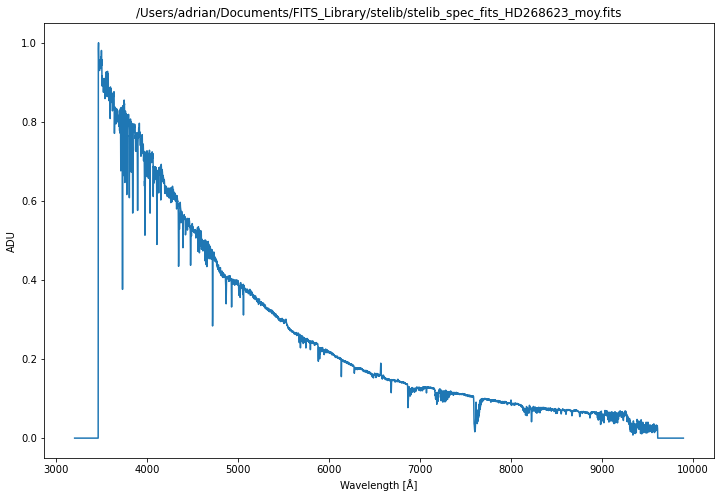

In [3]:
# Path and name of one file to check the library
file = root+"/stelib_spec_fits_HD268623_moy.fits"

# Print the header
sp = fits.open(file)
print('\n\nHeader of the spectrum :\n\n', sp[0].header, '\n\n')

# Extracting and normalizing the fluxes
flux2 = np.array(sp[0].data)
flux_norm = np.reshape(flux2/(np.nanmax(flux2)), (sp[0].header['NAXIS1']))

# Extracting the wavelengths
wave2 = np.ones(sp[0].header['NAXIS1'], dtype=float)
for i in range(sp[0].header['NAXIS1']):
    wave2[i] = sp[0].header['CRVAL1'] + i*sp[0].header['CDELT1']

# Closing the fits-file
sp.close()
# Plot the spectrum
fig = plt.figure(1, figsize=(12, 8))
plt.plot(wave2, flux_norm)
plt.xlabel('Wavelength [Å]')
plt.ylabel('ADU')
plt.title(file)
plt.show()

In [4]:
# Counting the spectra and printing the spectrum dimension
num = 1
for path, subdirs, files in os.walk(root):
    for nanme in files:
        num += 1
dim1 = sp[0].header['NAXIS1']
print(num)
print(dim1)

257
6700


In [5]:
# Creating the custom_set with all the spectra and generating labels to enable recovering header information
curves = 0
custom_set = np.zeros((num, dim1))
label_set = np.zeros((num, ), dtype=int)
spectra_set = [''] * num 

for path, subdirs, files in os.walk(root):
    for name in files:
        file = [os.path.join(path, name)]
        str = " " 
        Ffile = (str.join(file))
        route = Path(name)
        Fname = route.with_suffix('')
        Fpng = route.with_suffix('.png')

        data, header = fits.getdata(Ffile, header=True)
        hdu_number = 0
        fits.getheader(Ffile, hdu_number)
        fits_file = Ffile
        
        with fits.open(fits_file, mode='readonly') as hdulist:
            hdulist.info()
            data = np.array(hdulist[0].data)
             
            data_norm = np.reshape(data/(np.nanmax(data)), (sp[0].header['NAXIS1']))

            
            label_set[curves] = curves 
            spectra_set[curves] = name
            for i in range (dim1):
                custom_set[curves,i] = (data_norm[i])
        hdulist.close   
        curves += 1
               
        print ("Spectra loaded:",curves+1, "spectra");


Filename: /Users/adrian/Documents/FITS_Library/stelib/stelib_spec_fits_HD195725_moy.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   (6700,)   float32   
Spectra loaded: 2 spectra
Filename: /Users/adrian/Documents/FITS_Library/stelib/stelib_spec_fits_HD148513_moy.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   (6700,)   float32   
Spectra loaded: 3 spectra
Filename: /Users/adrian/Documents/FITS_Library/stelib/stelib_spec_fits_HD141004_moy.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   (6700,)   float32   
Spectra loaded: 4 spectra
Filename: /Users/adrian/Documents/FITS_Library/stelib/stelib_spec_fits_HD139641_moy.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   (6700,)   float32   
Spectra loaded: 5 spectra
Filename: /Users/adrian/Documents/FITS_L

Spectra loaded: 36 spectra
Filename: /Users/adrian/Documents/FITS_Library/stelib/stelib_spec_fits_HD37394_moy.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   (6700,)   float32   
Spectra loaded: 37 spectra
Filename: /Users/adrian/Documents/FITS_Library/stelib/stelib_spec_fits_HD111028_moy.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   (6700,)   float32   
Spectra loaded: 38 spectra
Filename: /Users/adrian/Documents/FITS_Library/stelib/stelib_spec_fits_HD135722_moy.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   (6700,)   float32   
Spectra loaded: 39 spectra
Filename: /Users/adrian/Documents/FITS_Library/stelib/stelib_spec_fits_HD87737_moy.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   (6700,)   float32   
Spectra loaded: 40 spectra
Filename: /

Filename: /Users/adrian/Documents/FITS_Library/stelib/stelib_spec_fits_HD029574_moy.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   (6700,)   float32   
Spectra loaded: 71 spectra
Filename: /Users/adrian/Documents/FITS_Library/stelib/stelib_spec_fits_HD32537_moy.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   (6700,)   float32   
Spectra loaded: 72 spectra
Filename: /Users/adrian/Documents/FITS_Library/stelib/stelib_spec_fits_HD141714_moy.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   (6700,)   float32   
Spectra loaded: 73 spectra
Filename: /Users/adrian/Documents/FITS_Library/stelib/stelib_spec_fits_HD138290_moy.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   (6700,)   float32   
Spectra loaded: 74 spectra
Filename: /Users/adrian/Documents/FIT

Spectra loaded: 105 spectra
Filename: /Users/adrian/Documents/FITS_Library/stelib/stelib_spec_fits_HD39801_moy.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   (6700,)   float32   
Spectra loaded: 106 spectra
Filename: /Users/adrian/Documents/FITS_Library/stelib/stelib_spec_fits_HD037680_moy.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   (6700,)   float32   
Spectra loaded: 107 spectra
Filename: /Users/adrian/Documents/FITS_Library/stelib/stelib_spec_fits_HD85235_moy.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   (6700,)   float32   
Spectra loaded: 108 spectra
Filename: /Users/adrian/Documents/FITS_Library/stelib/stelib_spec_fits_HD50420_moy.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   (6700,)   float32   
Spectra loaded: 109 spectra
Filenam

Spectra loaded: 139 spectra
Filename: /Users/adrian/Documents/FITS_Library/stelib/stelib_spec_fits_HD165195_moy.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   (6700,)   float32   
Spectra loaded: 140 spectra
Filename: /Users/adrian/Documents/FITS_Library/stelib/stelib_spec_fits_HD197345_moy.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   (6700,)   float32   
Spectra loaded: 141 spectra
Filename: /Users/adrian/Documents/FITS_Library/stelib/stelib_spec_fits_HD78418_moy.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   (6700,)   float32   
Spectra loaded: 142 spectra
Filename: /Users/adrian/Documents/FITS_Library/stelib/stelib_spec_fits_HD181470_moy.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   (6700,)   float32   
Spectra loaded: 143 spectra
Filen

Spectra loaded: 173 spectra
Filename: /Users/adrian/Documents/FITS_Library/stelib/stelib_spec_fits_HD112300_moy.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   (6700,)   float32   
Spectra loaded: 174 spectra
Filename: /Users/adrian/Documents/FITS_Library/stelib/stelib_spec_fits_HD108177_moy.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   (6700,)   float32   
Spectra loaded: 175 spectra
Filename: /Users/adrian/Documents/FITS_Library/stelib/stelib_spec_fits_HD269697_moy.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   (6700,)   float32   
Spectra loaded: 176 spectra
Filename: /Users/adrian/Documents/FITS_Library/stelib/stelib_spec_fits_HD101606_moy.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   (6700,)   float32   
Spectra loaded: 177 spectra
File

Spectra loaded: 207 spectra
Filename: /Users/adrian/Documents/FITS_Library/stelib/stelib_spec_fits_HD144206_moy.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   (6700,)   float32   
Spectra loaded: 208 spectra
Filename: /Users/adrian/Documents/FITS_Library/stelib/stelib_spec_fits_HD154733_moy.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   (6700,)   float32   
Spectra loaded: 209 spectra
Filename: /Users/adrian/Documents/FITS_Library/stelib/stelib_spec_fits_HD87822_moy.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   (6700,)   float32   
Spectra loaded: 210 spectra
Filename: /Users/adrian/Documents/FITS_Library/stelib/stelib_spec_fits_HD47839_moy.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   (6700,)   float32   
Spectra loaded: 211 spectra
Filena

Spectra loaded: 241 spectra
Filename: /Users/adrian/Documents/FITS_Library/stelib/stelib_spec_fits_HD130948_moy.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   (6700,)   float32   
Spectra loaded: 242 spectra
Filename: /Users/adrian/Documents/FITS_Library/stelib/stelib_spec_fits_HD107213_moy.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   (6700,)   float32   
Spectra loaded: 243 spectra
Filename: /Users/adrian/Documents/FITS_Library/stelib/stelib_spec_fits_HD164349_moy.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   (6700,)   float32   
Spectra loaded: 244 spectra
Filename: /Users/adrian/Documents/FITS_Library/stelib/stelib_spec_fits_HD88609_moy.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   (6700,)   float32   
Spectra loaded: 245 spectra
Filen

In [6]:
custom_set.shape

(257, 6700)

In [7]:
label_set.shape

(257,)

## Importing the VAE model
Generated with the 6D-VAE_STELIB-augmented_Demo Notebook

In [8]:
vae6D = tf.keras.models.load_model('STELIB_6DVAE-augmented_OK.tf')

2023-05-03 03:32:14.001611: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
vae6D.load_weights('STELIB_6DVAE-augmented_Weights')

In [10]:
encoder = tf.keras.models.load_model('STELIB_6D_Encoder-augmented_OK.tf')

In [11]:
decoder = tf.keras.models.load_model('STELIB_6D_Decoder-augmented_OK.tf')

In [12]:
class Sampling(layers.Layer):
    """Uses (z_mean, z_log_var) to sample z, the vector encoding a digit."""

    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim), mean=0., stddev=0.1)
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

In [13]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
vae6D.compile(optimizer, loss=tf.keras.losses.MeanSquaredError())

## Obtaining the latent vectors and decoded spectra

In [14]:
encoded_spectra = encoder(custom_set)

In [15]:
decoded_spectra = vae6D(custom_set)

In [16]:
encoded_spectra.shape

TensorShape([257, 6])

## Exploring the library

In [18]:
from sklearn.metrics import r2_score

from urllib.parse import urlencode
from astroquery.simbad import Simbad                                                            
from astropy.coordinates import SkyCoord
import astropy.units as u

import aplpy

from pythonosc import udp_client
import time

In [19]:
encoded_spectra.shape

TensorShape([257, 6])

In [20]:
encoded_spectra = np.squeeze(encoded_spectra)

In [21]:
x = np.zeros((len(encoded_spectra), 6))

In [22]:
ra_stelib = []
dec_stelib = []
for j in range(len(encoded_spectra)-1):
    
    #   Opening FITS and getting coordinates
    target = files[j]
    file2 = root+"/"+target

    sp2 = fits.open(file2)
    print('\n\nHeader of the spectrum :\n\n', sp2[0].header, '\n\n')
    ra_spectra = sp2[0].header['RA']
    dec_spectra = sp2[0].header['DEC']
    print(sp2[0].header['OBJECT'])   
    sp2.close()
#--------------------------------------            
     #   Converting coordinates
    try:
        hours, minutes, seconds = ra_spectra.split(':')
        ra_ok = f"{hours}h{minutes}m{seconds}s"
        days, minutes, seconds = dec_spectra.split(':')
        dec_ok = f"{days}d{minutes}m{seconds}s"
        c = SkyCoord(ra_ok, dec_ok, frame='icrs')
        ra_stelib.append(ra_ok)
        dec_stelib.append(dec_ok)
    except:
        ra_ok = 0
        dec_ok = 0
        ra_stelib.append(ra_ok)
        dec_stelib.append(dec_ok)

  



Header of the spectrum :

 SIMPLE  =                    T / file does conform to FITS standard             BITPIX  =                  -32 / number of bits per data pixel                  NAXIS   =                    1 / number of data axes                            NAXIS1  =                 6700 / length of data axis 1                          EXTEND  =                    T / FITS dataset may contain extensions            OBJECT  = 'HD195725           '/ star identification                            ORIGIN  = 'Laboratoire D'astrophysique, OMP, Toulouse, France' /                DATE    = '10-04-99'           /                                                TELESCOP= 'Jacobus Kaptein Telescope, RMO, La Palma, Spain ' /                  INSTRUME= 'RBS '               /Instrument                                      BUNIT   = 'erg /s /cm2 /angstroms ' /Physical units of data array               OBSERVER= 'J.F. Le Borgne, R. Pello, R. Vilchez ' / Name of Observers           RA      = '



Header of the spectrum :

 SIMPLE  =                    T / file does conform to FITS standard             BITPIX  =                  -32 / number of bits per data pixel                  NAXIS   =                    1 / number of data axes                            NAXIS1  =                 6700 / length of data axis 1                          EXTEND  =                    T / FITS dataset may contain extensions            OBJECT  = 'HD161817           '/ star identification                            ORIGIN  = 'Laboratoire D'astrophysique, OMP, Toulouse, France' /                DATE    = '10-04-99'           /                                                TELESCOP= 'Jacobus Kaptein Telescope, RMO, La Palma, Spain ' /                  INSTRUME= 'RBS '               /Instrument                                      BUNIT   = 'erg /s /cm2 /angstroms ' /Physical units of data array               OBSERVER= 'J.F. Le Borgne, R. Pello, R. Vilchez ' / Name of Observers           RA      = '



Header of the spectrum :

 SIMPLE  =                    T / file does conform to FITS standard             BITPIX  =                  -32 / number of bits per data pixel                  NAXIS   =                    1 / number of data axes                            NAXIS1  =                 6700 / length of data axis 1                          EXTEND  =                    T / FITS dataset may contain extensions            DATE    = '25/05/99'           / FITS file creation date (dd/mm/yy)             OBJECT  = 'G319               '/ star identification                            ORIGIN  = 'Laboratoire D'astrophysique, OMP, Toulouse, France' /                TELESCOP= '2.3m, Siding Spring Observatory, Australia ' /                       INSTRUME= 'DBS '               /Instrument                                      BUNIT   = 'erg /s /cm2 /angstroms ' /Physical units of data array               OBSERVER= 'A. Lancon ' / Name of Observers                                      RA      =  



Header of the spectrum :

 SIMPLE  =                    T / file does conform to FITS standard             BITPIX  =                  -32 / number of bits per data pixel                  NAXIS   =                    1 / number of data axes                            NAXIS1  =                 6700 / length of data axis 1                          EXTEND  =                    T / FITS dataset may contain extensions            OBJECT  = 'HD134169           '/ star identification                            ORIGIN  = 'Laboratoire D'astrophysique, OMP, Toulouse, France' /                DATE    = '10-04-99'           /                                                TELESCOP= 'Jacobus Kaptein Telescope, RMO, La Palma, Spain ' /                  INSTRUME= 'RBS '               /Instrument                                      BUNIT   = 'erg /s /cm2 /angstroms ' /Physical units of data array               OBSERVER= 'J.F. Le Borgne, R. Pello, R. Vilchez ' / Name of Observers           RA      = '

In [23]:
coords = SkyCoord(ra_stelib,dec_stelib,frame='icrs',unit='deg')
coords

<SkyCoord (ICRS): (ra, dec) in deg
    [(307.19558333,  6.28289167e+01), (246.49954167,  7.71083333e-01),
     (236.6175    ,  7.35116667e+00), (234.0135    ,  4.05205000e+01),
     (262.32904167,  5.23431944e+01), (100.21904167,  2.51825000e+01),
     (292.63045833,  2.62803056e+01), (218.6775    ,  2.97415833e+01),
     (141.93929167, -6.07616667e+00), (  0.        ,  0.00000000e+00),
     (213.4185    , -8.48555556e-01), (135.53220833,  2.63648056e+01),
     (258.33295833,  3.68668889e+01), (213.9975    , -6.00472222e+00),
     (  0.        ,  0.00000000e+00), (269.637     ,  3.01853889e+01),
     (196.833     , -5.27630556e+00), (  0.        ,  0.00000000e+00),
     ( 93.01333333,  2.94926944e+01), (  0.        ,  0.00000000e+00),
     (215.7855    ,  2.53335000e+01), (281.76291667,  1.81796944e+01),
     (297.62395833,  4.69024167e+01), (299.76904167,  2.76131944e+01),
     (199.197     ,  9.42247222e+00), (  0.        ,  0.00000000e+00),
     (  0.        ,  0.00000000e+00), (234

In [24]:
import warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mocpy import MOC, World2ScreenMPL

from astropy.coordinates import Angle, SkyCoord
import astropy.units as u
from astroquery.vizier import Vizier
import plotly.express as px

## Graphical Stelib

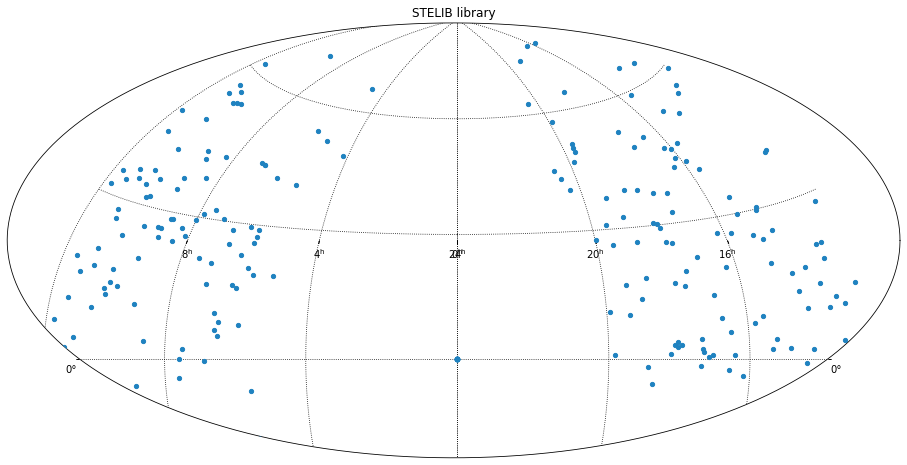

In [26]:
from astropy.visualization.wcsaxes.frame import EllipticalFrame

fig = plt.figure(figsize=(16,8))
 
with World2ScreenMPL(
    fig,
    fov=320 * u.deg,
    center=SkyCoord(0, 0, unit='deg', frame='icrs'),
    coordsys="icrs",
    rotation=Angle(0, u.degree),
) as wcs:
    ax = fig.add_subplot(111, projection=wcs, frame_class=EllipticalFrame)
    ax.set_title("STELIB library")
    ax.grid(color="black", linestyle="dotted")    
    ax.scatter(coords.ra,coords.dec,marker='o',color='#1f82c0',s=18,transform=ax.get_transform('world'),zorder=10)

## "On the fly" Multimodal display

In [ ]:
for j in range(len(encoded_spectra)-1):
    # Opening FITS and getting coordinates
    target = files[j]
    file2 = root+"/"+target
    sp2 = fits.open(file2)
    ra_spectra = sp2[0].header['RA']
    dec_spectra = sp2[0].header['DEC']
    print(sp2[0].header['OBJECT'])   
    sp2.close()
    # Converting coordinates
    try:
        hours, minutes, seconds = ra_spectra.split(':')
        ra_ok = f"{hours}h{minutes}m{seconds}s"
        days, minutes, seconds = dec_spectra.split(':')
        dec_ok = f"{days}d{minutes}m{seconds}s"
        c = SkyCoord(ra_ok, dec_ok, frame='icrs')
        ra_stelib.append(ra_ok)
        dec_stelib.append(dec_ok)
    except:
        ra_ok = 0
        dec_ok = 0
    objects = sp2[0].header['OBJECT']
    # Closing FITS
    sp2.close() 
    # Querying and Plotting star    
    try:
        query_params = { 
                 'hips': 'DSS', 
                 'object': objects, 
                 'fov': (3 * u.arcmin).to(u.deg).value, 
                 'width': 800, 
                 'height': 350 
                }                                                                                               
        url = f'http://alasky.u-strasbg.fr/hips-image-services/hips2fits?{urlencode(query_params)}' 
        hdul = fits.open(url)
        gc = aplpy.FITSFigure(hdul)                                                                     
        gc.show_grayscale() 
        gc.save('Star.png', transparent=True)  
        # Representing coordinates
        fig3 = plt.figure(figsize=(16,8))
        with World2ScreenMPL(
            fig3,
            fov=320 * u.deg,
            center=SkyCoord(0, 0, unit='deg', frame='icrs'),
            coordsys="icrs",
            rotation=Angle(0, u.degree),
        ) as wcs:
            ax = fig3.add_subplot(111, projection=wcs, frame_class=EllipticalFrame)
            ax.set_title("STELIB library", fontsize=18)
            ax.grid(color="black", linestyle="dotted")
            # Representing all stars of STELIB library
            ax.scatter(coords.ra,coords.dec
                       ,marker='o',color='#1f82c0'
                       ,s=18,transform=ax.get_transform('world'),zorder=10)
            # Representing current star            
            ax.scatter(c.ra.degree,c.dec.degree
                       ,marker='o',color='red'
                       ,s=52,transform=ax.get_transform('world'),zorder=10)
            # Plotting sky map with all stars in blue and current star in red       
            plt.savefig('Sky.png', transparent=True)


        # Multiplying factor to reach audible range         
        x[j] = encoded_spectra[j]*100000
        # Sending via OSC         
        client_s = udp_client.SimpleUDPClient("127.0.0.1", 9989)
        client_s.send_message("/s", 1)

        client0 = udp_client.SimpleUDPClient("127.0.0.1", 9990)   
        client0.send_message("/lat0", x[j][0])
        print("latent 0 =", x[j][0])

        client1 = udp_client.SimpleUDPClient("127.0.0.1", 9991) 
        client1.send_message("/lat1", x[j][1])
        print("latent 1 =", x[j][1])

        client2 = udp_client.SimpleUDPClient("127.0.0.1", 9992) 
        client2.send_message("/lat2", x[j][2])
        print("latent 2 =", x[j][2])

        client3 = udp_client.SimpleUDPClient("127.0.0.1", 9993)
        client3.send_message("/lat3", x[j][3])
        print("latent 3 =", x[j][3])

        client4 = udp_client.SimpleUDPClient("127.0.0.1", 9994) 
        client4.send_message("/lat4", x[j][4])
        print("latent 4 =", x[j][4])

        client5 = udp_client.SimpleUDPClient("127.0.0.1", 9995)
        client5.send_message("/lat5", x[j][5])
        print("latent 5 =", x[j][5])

        client6 = udp_client.SimpleUDPClient("127.0.0.1", 9996) 
        client6.send_message("/ra", c.ra.degree)
        print("ra =", c.ra.degree)

        client7 = udp_client.SimpleUDPClient("127.0.0.1", 9997) 
        client7.send_message("/dec", c.dec.degree)
        print("dec =", c.dec.degree)
        
        print("Rsquared:", r2_score(custom_set[j], decoded_spectra[j], multioutput='variance_weighted'))
        
        # Introducing the duration (3.5)
        time.sleep(3.5)

        client_s.send_message("/s", 0)
        # Plotting and saving the original spectra and decoded output                             
        fig, ax = plt.subplots(1, 2, figsize=(16, 6))
        ax[0].plot(wave2, custom_set[j])
        ax[0].set_xlabel('Original Spectrum [Å]')
        ax[0].set_ylabel('ADU')
        plt.title(sp2[0].header['OBJECT'],fontsize=14)
        ax[1].plot(wave2, decoded_spectra[j])
        ax[1].set_xlabel('Decoded Spectrum [Å]')
        ax[1].set_ylabel('ADU')     
        plt.savefig('VAE_result.png', transparent=True)
    # Managing failure    
    except:
        client_s = udp_client.SimpleUDPClient("127.0.0.1", 9989)
        client_s.send_message("/s", 0)

HD195725
INFO: Auto-setting vmin to  1.681e+03 [aplpy.core]
INFO: Auto-setting vmax to  2.726e+04 [aplpy.core]
latent 0 = 4567.950218915939
latent 1 = -991.582777351141
latent 2 = -1360.3412546217442
latent 3 = 1731.8595200777054
latent 4 = -673.7346295267344
latent 5 = 981.9701313972473
ra = 307.1955833333333
dec = 62.82891666666667
Rsquared: 0.9979982380164701
HD148513
INFO: Auto-setting vmin to  2.761e+03 [aplpy.core]


/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/matplotlib/transforms.py:177: ResourceWarning: unclosed file <_io.BufferedReader name='/Users/adrian/.astropy/cache/download/url/5fb1c968b7b853473ceecc2476b71a8c/contents'>
  ref = weakref.ref(self, lambda ref, sid=id(self),


INFO: Auto-setting vmax to  2.650e+04 [aplpy.core]


/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:82: ResourceWarning: unclosed <socket.socket fd=101, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 54095)>
  client_s = udp_client.SimpleUDPClient("127.0.0.1", 9989)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:85: ResourceWarning: unclosed <socket.socket fd=102, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 58787)>
  client0 = udp_client.SimpleUDPClient("127.0.0.1", 9990)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:89: ResourceWarning: unclosed <socket.socket fd=103, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 57230)>
  client1 = udp_client.SimpleUDPClient("127.0.0.1", 9991)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:93: ResourceWarning: unclosed <socket.socket fd=104, family=AddressFamily.A

latent 0 = -1091.9398628175259
latent 1 = 1152.360811829567
latent 2 = -386.62264123559
latent 3 = -2666.1552488803864
latent 4 = 846.8056097626686
latent 5 = 162.84675803035498
ra = 246.49954166666666
dec = 0.7710833333333333
Rsquared: 0.9911086182323654
HD141004
INFO: Auto-setting vmin to  3.798e+03 [aplpy.core]
INFO: Auto-setting vmax to  2.644e+04 [aplpy.core]


/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:82: ResourceWarning: unclosed <socket.socket fd=99, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 64572)>
  client_s = udp_client.SimpleUDPClient("127.0.0.1", 9989)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:85: ResourceWarning: unclosed <socket.socket fd=100, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 56152)>
  client0 = udp_client.SimpleUDPClient("127.0.0.1", 9990)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:89: ResourceWarning: unclosed <socket.socket fd=101, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 62923)>
  client1 = udp_client.SimpleUDPClient("127.0.0.1", 9991)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:93: ResourceWarning: unclosed <socket.socket fd=102, family=AddressFamily.AF

latent 0 = -642.365450039506
latent 1 = -639.5759526640177
latent 2 = -76.73816871829331
latent 3 = -724.4216743856668
latent 4 = -516.9464275240898
latent 5 = -1268.9702212810516
ra = 236.6175
dec = 7.351166666666666
Rsquared: 0.9790309312157933
HD139641
INFO: Auto-setting vmin to  3.609e+03 [aplpy.core]
INFO: Auto-setting vmax to  2.515e+04 [aplpy.core]


/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:82: ResourceWarning: unclosed <socket.socket fd=112, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 60585)>
  client_s = udp_client.SimpleUDPClient("127.0.0.1", 9989)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:85: ResourceWarning: unclosed <socket.socket fd=99, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 51030)>
  client0 = udp_client.SimpleUDPClient("127.0.0.1", 9990)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:89: ResourceWarning: unclosed <socket.socket fd=100, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 54789)>
  client1 = udp_client.SimpleUDPClient("127.0.0.1", 9991)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:93: ResourceWarning: unclosed <socket.socket fd=101, family=AddressFamily.AF

latent 0 = -7053.110748529434
latent 1 = -3641.5599286556244
latent 2 = 1349.5433144271374
latent 3 = 628.2689981162548
latent 4 = 708.5589226335287
latent 5 = -2090.4285833239555
ra = 234.01349999999996
dec = 40.5205
Rsquared: 0.9845798677177904
HD159181
INFO: Auto-setting vmin to  1.073e+04 [aplpy.core]
INFO: Auto-setting vmax to  2.589e+04 [aplpy.core]


/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:82: ResourceWarning: unclosed <socket.socket fd=114, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 51936)>
  client_s = udp_client.SimpleUDPClient("127.0.0.1", 9989)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:85: ResourceWarning: unclosed <socket.socket fd=112, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 60777)>
  client0 = udp_client.SimpleUDPClient("127.0.0.1", 9990)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:89: ResourceWarning: unclosed <socket.socket fd=99, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 53026)>
  client1 = udp_client.SimpleUDPClient("127.0.0.1", 9991)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:93: ResourceWarning: unclosed <socket.socket fd=100, family=AddressFamily.AF

latent 0 = 1516.1079354584217
latent 1 = 1757.1263015270233
latent 2 = -1527.0075760781765
latent 3 = -2919.0149158239365
latent 4 = 1084.1689072549343
latent 5 = 2034.2163741588593
ra = 262.3290416666666
dec = 52.34319444444445
Rsquared: 0.9921396908496231
HD48329
INFO: Auto-setting vmin to  1.244e+04 [aplpy.core]
INFO: Auto-setting vmax to  2.593e+04 [aplpy.core]


/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:82: ResourceWarning: unclosed <socket.socket fd=116, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 51190)>
  client_s = udp_client.SimpleUDPClient("127.0.0.1", 9989)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:85: ResourceWarning: unclosed <socket.socket fd=114, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 54498)>
  client0 = udp_client.SimpleUDPClient("127.0.0.1", 9990)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:89: ResourceWarning: unclosed <socket.socket fd=112, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 63112)>
  client1 = udp_client.SimpleUDPClient("127.0.0.1", 9991)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:93: ResourceWarning: unclosed <socket.socket fd=99, family=AddressFamily.AF

latent 0 = 59.39723341725767
latent 1 = 294.0543694421649
latent 2 = -1024.7113183140755
latent 3 = -1165.7826602458954
latent 4 = 1389.835774898529
latent 5 = 1296.713575720787
ra = 100.21904166666667
dec = 25.1825
Rsquared: 0.9945437569793875
HD338529
INFO: Auto-setting vmin to  1.674e+03 [aplpy.core]
INFO: Auto-setting vmax to  2.605e+04 [aplpy.core]


/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:82: ResourceWarning: unclosed <socket.socket fd=118, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 57883)>
  client_s = udp_client.SimpleUDPClient("127.0.0.1", 9989)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:85: ResourceWarning: unclosed <socket.socket fd=116, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 51983)>
  client0 = udp_client.SimpleUDPClient("127.0.0.1", 9990)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:89: ResourceWarning: unclosed <socket.socket fd=114, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 58186)>
  client1 = udp_client.SimpleUDPClient("127.0.0.1", 9991)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:93: ResourceWarning: unclosed <socket.socket fd=112, family=AddressFamily.A

latent 0 = 2396.624907851219
latent 1 = 2839.593030512333
latent 2 = -1018.0187411606312
latent 3 = -1666.0470515489578
latent 4 = 569.046288728714
latent 5 = 2350.511774420738
ra = 292.63045833333325
dec = 26.280305555555554
Rsquared: 0.9984220751018155


/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:133: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 2, figsize=(16, 6))
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/aplpy/core.py:256: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  self._figure = plt.figure(**kwargs)


HD128167
INFO: Auto-setting vmin to  3.884e+03 [aplpy.core]
INFO: Auto-setting vmax to  2.384e+04 [aplpy.core]


/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:45: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig3 = plt.figure(figsize=(16,8))
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:82: ResourceWarning: unclosed <socket.socket fd=120, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 62321)>
  client_s = udp_client.SimpleUDPClient("127.0.0.1", 9989)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:85: ResourceWarning: unclosed <socket.socket fd=118, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 64095)>
  client0 = udp_client.SimpleUDPClient("127.0.0.1", 9990)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T

latent 0 = -549.4190845638514
latent 1 = -1002.8834454715252
latent 2 = 188.0993600934744
latent 3 = -580.0298880785704
latent 4 = -601.8287502229214
latent 5 = -1715.853065252304
ra = 218.67749999999998
dec = 29.741583333333335
Rsquared: 0.9816582699707609


/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:133: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 2, figsize=(16, 6))
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/aplpy/core.py:256: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  self._figure = plt.figure(**kwargs)


HD81809
INFO: Auto-setting vmin to  3.605e+03 [aplpy.core]
INFO: Auto-setting vmax to  2.611e+04 [aplpy.core]


/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:45: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig3 = plt.figure(figsize=(16,8))
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:82: ResourceWarning: unclosed <socket.socket fd=122, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 55427)>
  client_s = udp_client.SimpleUDPClient("127.0.0.1", 9989)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:85: ResourceWarning: unclosed <socket.socket fd=120, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 61858)>
  client0 = udp_client.SimpleUDPClient("127.0.0.1", 9990)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T

latent 0 = -609.9109072238207
latent 1 = -1116.692554205656
latent 2 = -501.33918412029743
latent 3 = -1533.2643873989582
latent 4 = -948.6875496804714
latent 5 = -1741.0313710570335
ra = 141.93929166666663
dec = -6.0761666666666665
Rsquared: 0.9688202201773715


/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:133: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 2, figsize=(16, 6))
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/aplpy/core.py:256: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  self._figure = plt.figure(**kwargs)


HD033579


/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/pyparsing/core.py:791: ResourceWarning: unclosed file <_io.BufferedReader name='/Users/adrian/.astropy/cache/download/url/02e03b0f295f818afa641f4f5a2e2480/contents'>
  loc, tokens = self.parseImpl(instring, preloc, doActions)
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/pyparsing/core.py:791: ResourceWarning: unclosed file <_io.BufferedReader name='/Users/adrian/.astropy/cache/download/url/ac76aa0cbadde31ceccfbd190fee5831/contents'>
  loc, tokens = self.parseImpl(instring, preloc, doActions)
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/pyparsing/core.py:791: ResourceWarning: unclosed file <_io.BufferedReader name='/Users/adrian/.astropy/cache/download/url/47279c6838ac353a464339a40516f980/contents'>
  loc, tokens = self.parseImpl(instring, preloc, doActions)
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/pyparsing/core.py:791: ResourceWarning: unclosed file <_io.BufferedReader name='/Users/adrian/.ast

INFO: Auto-setting vmin to  9.747e+02 [aplpy.core]
INFO: Auto-setting vmax to  2.613e+04 [aplpy.core]


/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:45: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig3 = plt.figure(figsize=(16,8))
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:82: ResourceWarning: unclosed <socket.socket fd=124, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 62983)>
  client_s = udp_client.SimpleUDPClient("127.0.0.1", 9989)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:85: ResourceWarning: unclosed <socket.socket fd=122, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 59800)>
  client0 = udp_client.SimpleUDPClient("127.0.0.1", 9990)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T

latent 0 = 86.3431894686073
latent 1 = -1066.2533342838287
latent 2 = -149.02271796017885
latent 3 = 2284.2925041913986
latent 4 = 395.8602901548147
latent 5 = 1169.7180569171906
ra = 141.93929166666663
dec = -6.0761666666666665
Rsquared: 0.894040547943142


/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:133: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 2, figsize=(16, 6))
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/aplpy/core.py:256: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  self._figure = plt.figure(**kwargs)


HD124425
INFO: Auto-setting vmin to  2.100e+03 [aplpy.core]
INFO: Auto-setting vmax to  2.593e+04 [aplpy.core]


/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:45: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig3 = plt.figure(figsize=(16,8))
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:82: ResourceWarning: unclosed <socket.socket fd=102, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 58742)>
  client_s = udp_client.SimpleUDPClient("127.0.0.1", 9989)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:85: ResourceWarning: unclosed <socket.socket fd=103, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 58971)>
  client0 = udp_client.SimpleUDPClient("127.0.0.1", 9990)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T

latent 0 = -728.7442218512297
latent 1 = -829.5448496937752
latent 2 = 216.12874697893858
latent 3 = -116.44564801827073
latent 4 = -175.1864212565124
latent 5 = -875.7987059652805
ra = 213.41849999999997
dec = -0.8485555555555556
Rsquared: 0.990127379458129


/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:133: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 2, figsize=(16, 6))
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/aplpy/core.py:256: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  self._figure = plt.figure(**kwargs)


HD77729
INFO: Auto-setting vmin to  1.687e+03 [aplpy.core]
INFO: Auto-setting vmax to  2.599e+04 [aplpy.core]


/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:45: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig3 = plt.figure(figsize=(16,8))
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:82: ResourceWarning: unclosed <socket.socket fd=111, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 62982)>
  client_s = udp_client.SimpleUDPClient("127.0.0.1", 9989)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:85: ResourceWarning: unclosed <socket.socket fd=102, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 57381)>
  client0 = udp_client.SimpleUDPClient("127.0.0.1", 9990)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T

latent 0 = -2343.401499092579
latent 1 = 192.43392162024975
latent 2 = -1036.8771851062775
latent 3 = -2915.968745946884
latent 4 = 1304.4722378253937
latent 5 = 828.5236544907093
ra = 135.5322083333333
dec = 26.364805555555556
Rsquared: 0.984809656248735


/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:133: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 2, figsize=(16, 6))
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/aplpy/core.py:256: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  self._figure = plt.figure(**kwargs)


HD156283
INFO: Auto-setting vmin to  1.062e+04 [aplpy.core]
INFO: Auto-setting vmax to  2.425e+04 [aplpy.core]


/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:45: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig3 = plt.figure(figsize=(16,8))
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:82: ResourceWarning: unclosed <socket.socket fd=113, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 52832)>
  client_s = udp_client.SimpleUDPClient("127.0.0.1", 9989)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:85: ResourceWarning: unclosed <socket.socket fd=111, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 60979)>
  client0 = udp_client.SimpleUDPClient("127.0.0.1", 9990)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T

latent 0 = 1350.0369153916836
latent 1 = 2458.157017827034
latent 2 = -1263.6637315154076
latent 3 = -2994.108945131302
latent 4 = 952.5555185973644
latent 5 = 1805.1905557513237
ra = 258.3329583333333
dec = 36.86688888888889
Rsquared: 0.9967072407707607


/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:133: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 2, figsize=(16, 6))
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/aplpy/core.py:256: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  self._figure = plt.figure(**kwargs)


HD124850
INFO: Auto-setting vmin to  2.139e+03 [aplpy.core]
INFO: Auto-setting vmax to  2.652e+04 [aplpy.core]


/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:45: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig3 = plt.figure(figsize=(16,8))
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:82: ResourceWarning: unclosed <socket.socket fd=115, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 51379)>
  client_s = udp_client.SimpleUDPClient("127.0.0.1", 9989)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:85: ResourceWarning: unclosed <socket.socket fd=113, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 52458)>
  client0 = udp_client.SimpleUDPClient("127.0.0.1", 9990)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T

latent 0 = -623.4397180378437
latent 1 = -802.2163063287735
latent 2 = 372.6533614099026
latent 3 = 314.8543182760477
latent 4 = -485.38283444941044
latent 5 = -1416.961569339037
ra = 213.99749999999997
dec = -6.004722222222222
Rsquared: 0.9866690629635744


/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:133: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 2, figsize=(16, 6))
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/aplpy/core.py:256: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  self._figure = plt.figure(**kwargs)


HR4468
INFO: Auto-setting vmin to  1.703e+03 [aplpy.core]
INFO: Auto-setting vmax to  2.584e+04 [aplpy.core]


/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:45: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig3 = plt.figure(figsize=(16,8))
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:82: ResourceWarning: unclosed <socket.socket fd=117, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 49384)>
  client_s = udp_client.SimpleUDPClient("127.0.0.1", 9989)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:85: ResourceWarning: unclosed <socket.socket fd=115, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 60004)>
  client0 = udp_client.SimpleUDPClient("127.0.0.1", 9990)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T

latent 0 = -1238.188799470663
latent 1 = -8.213520050048828
latent 2 = 1227.144617587328
latent 3 = 2159.370109438896
latent 4 = -55.78612326644361
latent 5 = 366.4410673081875
ra = 213.99749999999997
dec = -6.004722222222222
Rsquared: 0.9832706815084907


/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:133: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 2, figsize=(16, 6))
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/aplpy/core.py:256: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  self._figure = plt.figure(**kwargs)


HD164136
INFO: Auto-setting vmin to  4.610e+03 [aplpy.core]
INFO: Auto-setting vmax to  2.652e+04 [aplpy.core]


/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:45: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig3 = plt.figure(figsize=(16,8))
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:82: ResourceWarning: unclosed <socket.socket fd=119, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 53155)>
  client_s = udp_client.SimpleUDPClient("127.0.0.1", 9989)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:85: ResourceWarning: unclosed <socket.socket fd=117, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 60185)>
  client0 = udp_client.SimpleUDPClient("127.0.0.1", 9990)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T

latent 0 = -54.46813884191215
latent 1 = -973.163079470396
latent 2 = -140.77158411964774
latent 3 = 140.15199849382043
latent 4 = -14.118697436060756
latent 5 = -274.89401400089264
ra = 269.63699999999994
dec = 30.185388888888887
Rsquared: 0.9901566545921173


/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:133: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 2, figsize=(16, 6))
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/aplpy/core.py:256: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  self._figure = plt.figure(**kwargs)


HR4963
INFO: Auto-setting vmin to  1.702e+03 [aplpy.core]
INFO: Auto-setting vmax to  2.651e+04 [aplpy.core]


/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:45: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig3 = plt.figure(figsize=(16,8))
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:82: ResourceWarning: unclosed <socket.socket fd=121, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 61723)>
  client_s = udp_client.SimpleUDPClient("127.0.0.1", 9989)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:85: ResourceWarning: unclosed <socket.socket fd=119, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 63642)>
  client0 = udp_client.SimpleUDPClient("127.0.0.1", 9990)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T

latent 0 = -888.3380331099033
latent 1 = 40.523961069993675
latent 2 = 1263.7185864150524
latent 3 = 1696.9185322523117
latent 4 = -397.21871726214886
latent 5 = -827.8616704046726
ra = 196.833
dec = -5.276305555555555
Rsquared: 0.9934499710236275


/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:133: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 2, figsize=(16, 6))
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/aplpy/core.py:256: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  self._figure = plt.figure(**kwargs)


HD104893
INFO: Auto-setting vmin to  1.272e+03 [aplpy.core]
INFO: Auto-setting vmax to  2.524e+04 [aplpy.core]


/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:45: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig3 = plt.figure(figsize=(16,8))
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:82: ResourceWarning: unclosed <socket.socket fd=123, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 63356)>
  client_s = udp_client.SimpleUDPClient("127.0.0.1", 9989)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:85: ResourceWarning: unclosed <socket.socket fd=121, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 51757)>
  client0 = udp_client.SimpleUDPClient("127.0.0.1", 9990)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T

latent 0 = -2536.0560044646263
latent 1 = -2099.0919321775436
latent 2 = -2048.584073781967
latent 3 = -1029.7666303813457
latent 4 = 2030.8798179030418
latent 5 = 3271.9042152166367
ra = 196.833
dec = -5.276305555555555
Rsquared: 0.9887524311220197


/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:133: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 2, figsize=(16, 6))
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/aplpy/core.py:256: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  self._figure = plt.figure(**kwargs)


HD42454
INFO: Auto-setting vmin to  2.042e+03 [aplpy.core]
INFO: Auto-setting vmax to  2.633e+04 [aplpy.core]


/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/pyparsing/exceptions.py:31: ResourceWarning: unclosed file <_io.BufferedReader name='/Users/adrian/.astropy/cache/download/url/9178b3393c99ae9aa35657ad8f274759/contents'>
  self.loc = loc
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/pyparsing/exceptions.py:31: ResourceWarning: unclosed file <_io.BufferedReader name='/Users/adrian/.astropy/cache/download/url/fd5ed86c78af89bb5d7078ddefec8fd4/contents'>
  self.loc = loc
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/pyparsing/exceptions.py:31: ResourceWarning: unclosed file <_io.BufferedReader name='/Users/adrian/.astropy/cache/download/url/a88c8a5c605572126874843e319d078c/contents'>
  self.loc = loc
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/pyparsing/exceptions.py:31: ResourceWarning: unclosed file <_io.BufferedReader name='/Users/adrian/.astropy/cache/download/url/7859d95a1dfb3491c623f1b181ee1f57/contents'>
  self.loc = loc
/Users/adrian/opt/anacon

latent 0 = 726.6082800924778
latent 1 = -1221.617590636015
latent 2 = -1959.5939666032791
latent 3 = -70.54100860841572
latent 4 = 1363.7866824865341
latent 5 = 3985.097259283066
ra = 93.01333333333332
dec = 29.492694444444446
Rsquared: 0.9886682077853024


/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:133: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 2, figsize=(16, 6))
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:40: ResourceWarning: unclosed file <_io.BufferedReader name='/Users/adrian/.astropy/cache/download/url/78bc9da31f1ff7de8f27272f2995d350/contents'>
  hdul = fits.open(url)
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/aplpy/core.py:256: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  self.

HD034816
INFO: Auto-setting vmin to  2.029e+03 [aplpy.core]
INFO: Auto-setting vmax to  2.602e+04 [aplpy.core]


/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:45: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig3 = plt.figure(figsize=(16,8))
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:82: ResourceWarning: unclosed <socket.socket fd=99, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 63233)>
  client_s = udp_client.SimpleUDPClient("127.0.0.1", 9989)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:85: ResourceWarning: unclosed <socket.socket fd=100, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 51158)>
  client0 = udp_client.SimpleUDPClient("127.0.0.1", 9990)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/

latent 0 = 1032.1354493498802
latent 1 = 167.29950439184904
latent 2 = 947.338156402111
latent 3 = 2058.238536119461
latent 4 = -690.4695183038712
latent 5 = -549.6806465089321
ra = 93.01333333333332
dec = 29.492694444444446
Rsquared: 0.9837476730257397


/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:133: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 2, figsize=(16, 6))
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/aplpy/core.py:256: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  self._figure = plt.figure(**kwargs)


HD126141
INFO: Auto-setting vmin to  1.670e+03 [aplpy.core]
INFO: Auto-setting vmax to  2.704e+04 [aplpy.core]


/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:45: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig3 = plt.figure(figsize=(16,8))
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:82: ResourceWarning: unclosed <socket.socket fd=110, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 64738)>
  client_s = udp_client.SimpleUDPClient("127.0.0.1", 9989)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:85: ResourceWarning: unclosed <socket.socket fd=99, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 64132)>
  client0 = udp_client.SimpleUDPClient("127.0.0.1", 9990)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/

latent 0 = -633.4252655506134
latent 1 = -715.8602587878704
latent 2 = 379.81695495545864
latent 3 = 57.23856738768518
latent 4 = -504.5449361205101
latent 5 = -1499.6596612036228
ra = 215.78549999999998
dec = 25.333499999999997
Rsquared: 0.9942602068946855


/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:133: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 2, figsize=(16, 6))
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/aplpy/core.py:256: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  self._figure = plt.figure(**kwargs)


HD173880
INFO: Auto-setting vmin to -8.190e+01 [aplpy.core]
INFO: Auto-setting vmax to  2.440e+04 [aplpy.core]


/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:45: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig3 = plt.figure(figsize=(16,8))
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:82: ResourceWarning: unclosed <socket.socket fd=112, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 53143)>
  client_s = udp_client.SimpleUDPClient("127.0.0.1", 9989)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:85: ResourceWarning: unclosed <socket.socket fd=110, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 49278)>
  client0 = udp_client.SimpleUDPClient("127.0.0.1", 9990)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T

latent 0 = 2234.554849565029
latent 1 = 3614.2870783805847
latent 2 = 423.9085130393505
latent 3 = -936.6481564939022
latent 4 = 840.5807428061962
latent 5 = 1668.2416200637817
ra = 281.7629166666666
dec = 18.179694444444447
Rsquared: 0.996053053011638


/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:133: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 2, figsize=(16, 6))
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/aplpy/core.py:256: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  self._figure = plt.figure(**kwargs)


HR7589
INFO: Auto-setting vmin to  4.633e+02 [aplpy.core]
INFO: Auto-setting vmax to  2.540e+04 [aplpy.core]


/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:45: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig3 = plt.figure(figsize=(16,8))
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:82: ResourceWarning: unclosed <socket.socket fd=114, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 59571)>
  client_s = udp_client.SimpleUDPClient("127.0.0.1", 9989)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:85: ResourceWarning: unclosed <socket.socket fd=112, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 54583)>
  client0 = udp_client.SimpleUDPClient("127.0.0.1", 9990)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T

latent 0 = 405.2210133522749
latent 1 = 1089.3582366406918
latent 2 = 1700.8937895298004
latent 3 = 262.69336231052876
latent 4 = -1769.847609102726
latent 5 = -3694.2195147275925
ra = 297.62395833333323
dec = 46.90241666666667
Rsquared: 0.9888084875316647


/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:133: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 2, figsize=(16, 6))
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/aplpy/core.py:256: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  self._figure = plt.figure(**kwargs)


HD189849
INFO: Auto-setting vmin to  6.696e+02 [aplpy.core]
INFO: Auto-setting vmax to  2.705e+04 [aplpy.core]


/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:45: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig3 = plt.figure(figsize=(16,8))
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:82: ResourceWarning: unclosed <socket.socket fd=116, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 60661)>
  client_s = udp_client.SimpleUDPClient("127.0.0.1", 9989)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:85: ResourceWarning: unclosed <socket.socket fd=114, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 52099)>
  client0 = udp_client.SimpleUDPClient("127.0.0.1", 9990)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T

latent 0 = 4224.52837228775
latent 1 = -944.469403475523
latent 2 = -424.95122179389
latent 3 = 2166.6154265403748
latent 4 = -971.5922176837921
latent 5 = 845.5582894384861
ra = 299.7690416666666
dec = 27.613194444444446
Rsquared: 0.9945818935218914


/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:133: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 2, figsize=(16, 6))
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/aplpy/core.py:256: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  self._figure = plt.figure(**kwargs)


HD115383
INFO: Auto-setting vmin to  2.354e+03 [aplpy.core]
INFO: Auto-setting vmax to  2.676e+04 [aplpy.core]


/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:45: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig3 = plt.figure(figsize=(16,8))
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:82: ResourceWarning: unclosed <socket.socket fd=118, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 59613)>
  client_s = udp_client.SimpleUDPClient("127.0.0.1", 9989)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:85: ResourceWarning: unclosed <socket.socket fd=116, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 54471)>
  client0 = udp_client.SimpleUDPClient("127.0.0.1", 9990)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T

latent 0 = -660.3028625249863
latent 1 = -465.46696685254574
latent 2 = 67.30104214511812
latent 3 = -545.2959332615137
latent 4 = -487.12012358009815
latent 5 = -1191.8800882995129
ra = 199.197
dec = 9.422472222222222
Rsquared: 0.9845904371322967


/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:133: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 2, figsize=(16, 6))
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/aplpy/core.py:256: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  self._figure = plt.figure(**kwargs)


HD063077
INFO: Auto-setting vmin to  3.854e+03 [aplpy.core]
INFO: Auto-setting vmax to  2.660e+04 [aplpy.core]


/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:45: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig3 = plt.figure(figsize=(16,8))
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:82: ResourceWarning: unclosed <socket.socket fd=120, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 61261)>
  client_s = udp_client.SimpleUDPClient("127.0.0.1", 9989)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:85: ResourceWarning: unclosed <socket.socket fd=118, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 61178)>
  client0 = udp_client.SimpleUDPClient("127.0.0.1", 9990)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T

latent 0 = -1391.4900831878185
latent 1 = -1714.2541706562042
latent 2 = -342.42470283061266
latent 3 = 521.5299315750599
latent 4 = 620.5998361110687
latent 5 = 910.7751771807671
ra = 199.197
dec = 9.422472222222222
Rsquared: 0.9748332165591322


/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:133: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 2, figsize=(16, 6))
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/aplpy/core.py:256: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  self._figure = plt.figure(**kwargs)


HD086161
INFO: Auto-setting vmin to  1.360e+03 [aplpy.core]
INFO: Auto-setting vmax to  2.607e+04 [aplpy.core]


/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:45: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig3 = plt.figure(figsize=(16,8))
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:82: ResourceWarning: unclosed <socket.socket fd=122, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 53712)>
  client_s = udp_client.SimpleUDPClient("127.0.0.1", 9989)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:85: ResourceWarning: unclosed <socket.socket fd=120, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 60643)>
  client0 = udp_client.SimpleUDPClient("127.0.0.1", 9990)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T

latent 0 = 1073.7753473222256
latent 1 = 1805.972121655941
latent 2 = 1362.9677705466747
latent 3 = 1007.3753073811531
latent 4 = -436.31731532514095
latent 5 = -431.62084184587
ra = 199.197
dec = 9.422472222222222
Rsquared: 0.6294059356592818


/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:133: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 2, figsize=(16, 6))
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/aplpy/core.py:256: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  self._figure = plt.figure(**kwargs)


HD139798
INFO: Auto-setting vmin to  2.641e+03 [aplpy.core]
INFO: Auto-setting vmax to  2.570e+04 [aplpy.core]


/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:45: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig3 = plt.figure(figsize=(16,8))
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:82: ResourceWarning: unclosed <socket.socket fd=124, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 57886)>
  client_s = udp_client.SimpleUDPClient("127.0.0.1", 9989)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:85: ResourceWarning: unclosed <socket.socket fd=122, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 52659)>
  client0 = udp_client.SimpleUDPClient("127.0.0.1", 9990)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T

latent 0 = -485.0155208259821
latent 1 = -726.6436237841845
latent 2 = 340.30082169920206
latent 3 = 185.74012210592628
latent 4 = -273.7183589488268
latent 5 = -1160.7127264142036
ra = 234.57149999999996
dec = 46.80330555555555
Rsquared: 0.9331251640296969


/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:133: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 2, figsize=(16, 6))
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/aplpy/core.py:256: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  self._figure = plt.figure(**kwargs)


HD39866
INFO: Auto-setting vmin to  7.111e+02 [aplpy.core]
INFO: Auto-setting vmax to  2.548e+04 [aplpy.core]


/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:45: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig3 = plt.figure(figsize=(16,8))
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:82: ResourceWarning: unclosed <socket.socket fd=126, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 62309)>
  client_s = udp_client.SimpleUDPClient("127.0.0.1", 9989)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:85: ResourceWarning: unclosed <socket.socket fd=124, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 59438)>
  client0 = udp_client.SimpleUDPClient("127.0.0.1", 9990)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T

latent 0 = -433.5781093686819
latent 1 = -606.4231973141432
latent 2 = 552.7854431420565
latent 3 = 950.7960639894009
latent 4 = -204.84779961407185
latent 5 = 120.54996332153678
ra = 88.35149999999999
dec = 28.939
Rsquared: 0.979345334008888


/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:133: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 2, figsize=(16, 6))
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/aplpy/core.py:256: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  self._figure = plt.figure(**kwargs)


HD271163
INFO: Auto-setting vmin to  2.596e+03 [aplpy.core]
INFO: Auto-setting vmax to  1.629e+04 [aplpy.core]


/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/pyparsing/core.py:5098: ResourceWarning: unclosed file <_io.BufferedReader name='/Users/adrian/.astropy/cache/download/url/06db81445f4e2ee4045909cd67691efc/contents'>
  return super().parseImpl(instring, loc, doActions)
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/pyparsing/core.py:5098: ResourceWarning: unclosed file <_io.BufferedReader name='/Users/adrian/.astropy/cache/download/url/82b96c0c4b013ad9d099c3935f5431d1/contents'>
  return super().parseImpl(instring, loc, doActions)
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/pyparsing/core.py:5098: ResourceWarning: unclosed file <_io.BufferedReader name='/Users/adrian/.astropy/cache/download/url/e545fd65478d9538d777032785e891d0/contents'>
  return super().parseImpl(instring, loc, doActions)
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/pyparsing/core.py:5098: ResourceWarning: unclosed file <_io.BufferedReader name='/Users/adrian/.astropy/cache/downlo

latent 0 = 1090.8102616667747
latent 1 = -648.8942075520754
latent 2 = 491.9721744954586
latent 3 = 1981.7052409052849
latent 4 = -658.0084096640348
latent 5 = -196.37055229395628
ra = 88.35149999999999
dec = 28.939
Rsquared: 0.973582285017336


/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:133: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 2, figsize=(16, 6))
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:40: ResourceWarning: unclosed file <_io.BufferedReader name='/Users/adrian/.astropy/cache/download/url/dfda704743378fa40ba69e63a71516b2/contents'>
  hdul = fits.open(url)
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/aplpy/core.py:256: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  self.

HD32923
INFO: Auto-setting vmin to  7.346e+02 [aplpy.core]
INFO: Auto-setting vmax to  2.651e+04 [aplpy.core]


/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:45: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig3 = plt.figure(figsize=(16,8))
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:82: ResourceWarning: unclosed <socket.socket fd=99, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 52266)>
  client_s = udp_client.SimpleUDPClient("127.0.0.1", 9989)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:85: ResourceWarning: unclosed <socket.socket fd=100, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 50448)>
  client0 = udp_client.SimpleUDPClient("127.0.0.1", 9990)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/

latent 0 = 67.01876409351826
latent 1 = -1419.1004447638988
latent 2 = -833.9982479810715
latent 3 = -605.7665683329105
latent 4 = 481.882831081748
latent 5 = 117.02548945322633
ra = 76.86029166666665
dec = 18.64361111111111
Rsquared: 0.9970935229372199


/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:133: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 2, figsize=(16, 6))
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/aplpy/core.py:256: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  self._figure = plt.figure(**kwargs)


HD94247
INFO: Auto-setting vmin to  2.893e+03 [aplpy.core]
INFO: Auto-setting vmax to  2.601e+04 [aplpy.core]


/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:45: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig3 = plt.figure(figsize=(16,8))
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:82: ResourceWarning: unclosed <socket.socket fd=110, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 65318)>
  client_s = udp_client.SimpleUDPClient("127.0.0.1", 9989)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:85: ResourceWarning: unclosed <socket.socket fd=99, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 62860)>
  client0 = udp_client.SimpleUDPClient("127.0.0.1", 9990)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/

latent 0 = -1893.979124724865
latent 1 = 721.5851917862892
latent 2 = -726.1155173182487
latent 3 = -2828.838862478733
latent 4 = 1012.6721113920212
latent 5 = 595.2619947493076
ra = 163.38899999999998
dec = 54.58688888888889
Rsquared: 0.9902990217936181


/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:133: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 2, figsize=(16, 6))
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/aplpy/core.py:256: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  self._figure = plt.figure(**kwargs)


HD89758
INFO: Auto-setting vmin to  1.139e+04 [aplpy.core]
INFO: Auto-setting vmax to  2.621e+04 [aplpy.core]


/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:45: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig3 = plt.figure(figsize=(16,8))
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:82: ResourceWarning: unclosed <socket.socket fd=112, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 54290)>
  client_s = udp_client.SimpleUDPClient("127.0.0.1", 9989)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:85: ResourceWarning: unclosed <socket.socket fd=110, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 59118)>
  client0 = udp_client.SimpleUDPClient("127.0.0.1", 9990)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T

latent 0 = -3367.9578453302383
latent 1 = 2170.2781319618225
latent 2 = 167.76156844571233
latent 3 = -2219.928987324238
latent 4 = 1638.815924525261
latent 5 = 1295.3243218362331
ra = 154.8345
dec = 41.75230555555556
Rsquared: 0.9829049702170783


/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:133: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 2, figsize=(16, 6))
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/aplpy/core.py:256: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  self._figure = plt.figure(**kwargs)


HD147394
INFO: Auto-setting vmin to  3.337e+03 [aplpy.core]
INFO: Auto-setting vmax to  2.692e+04 [aplpy.core]


/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:45: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig3 = plt.figure(figsize=(16,8))
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:82: ResourceWarning: unclosed <socket.socket fd=114, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 49479)>
  client_s = udp_client.SimpleUDPClient("127.0.0.1", 9989)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:85: ResourceWarning: unclosed <socket.socket fd=112, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 64276)>
  client0 = udp_client.SimpleUDPClient("127.0.0.1", 9990)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T

latent 0 = -95.94354778528214
latent 1 = -442.07582250237465
latent 2 = 1249.6615760028362
latent 3 = 1171.4576743543148
latent 4 = -1352.5353744626045
latent 5 = -2608.116902410984
ra = 244.55704166666666
dec = 46.43380555555555
Rsquared: 0.990191051591713


/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:133: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 2, figsize=(16, 6))
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/aplpy/core.py:256: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  self._figure = plt.figure(**kwargs)


HD157856
INFO: Auto-setting vmin to  1.738e+03 [aplpy.core]
INFO: Auto-setting vmax to  2.605e+04 [aplpy.core]


/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:45: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig3 = plt.figure(figsize=(16,8))
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:82: ResourceWarning: unclosed <socket.socket fd=116, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 65074)>
  client_s = udp_client.SimpleUDPClient("127.0.0.1", 9989)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:85: ResourceWarning: unclosed <socket.socket fd=114, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 65446)>
  client0 = udp_client.SimpleUDPClient("127.0.0.1", 9990)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T

latent 0 = 4201.909527182579
latent 1 = -870.068185031414
latent 2 = -812.078732997179
latent 3 = 2018.2769745588303
latent 4 = -865.925382822752
latent 5 = 880.512036383152
ra = 261.4874166666666
dec = -1.6536666666666666
Rsquared: 0.9982818590787337


/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:133: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 2, figsize=(16, 6))
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/aplpy/core.py:256: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  self._figure = plt.figure(**kwargs)


HD37394
INFO: Auto-setting vmin to  1.520e+03 [aplpy.core]
INFO: Auto-setting vmax to  2.637e+04 [aplpy.core]


/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:45: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig3 = plt.figure(figsize=(16,8))
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:82: ResourceWarning: unclosed <socket.socket fd=118, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 50405)>
  client_s = udp_client.SimpleUDPClient("127.0.0.1", 9989)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:85: ResourceWarning: unclosed <socket.socket fd=116, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 61088)>
  client0 = udp_client.SimpleUDPClient("127.0.0.1", 9990)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T

latent 0 = 240.6470011919737
latent 1 = -1180.062908679247
latent 2 = -1425.3303408622742
latent 3 = -1554.8136085271835
latent 4 = 1231.52332380414
latent 5 = 793.4389635920525
ra = 85.33483333333332
dec = 53.48688888888889
Rsquared: 0.9895932079198804


/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:133: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 2, figsize=(16, 6))
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/aplpy/core.py:256: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  self._figure = plt.figure(**kwargs)


HD111028
INFO: Auto-setting vmin to  2.387e+03 [aplpy.core]
INFO: Auto-setting vmax to  2.629e+04 [aplpy.core]


/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:45: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig3 = plt.figure(figsize=(16,8))
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:82: ResourceWarning: unclosed <socket.socket fd=120, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 55057)>
  client_s = udp_client.SimpleUDPClient("127.0.0.1", 9989)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:85: ResourceWarning: unclosed <socket.socket fd=118, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 52046)>
  client0 = udp_client.SimpleUDPClient("127.0.0.1", 9990)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T

latent 0 = -778.3984765410423
latent 1 = -298.18154871463776
latent 2 = -1031.5065272152424
latent 3 = -2140.00828564167
latent 4 = 58.434432139620185
latent 5 = -287.65625320374966
ra = 190.9605
dec = 9.81188888888889
Rsquared: 0.9812617330383633


/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:133: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 2, figsize=(16, 6))
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/aplpy/core.py:256: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  self._figure = plt.figure(**kwargs)


HD135722
INFO: Auto-setting vmin to  5.788e+03 [aplpy.core]
INFO: Auto-setting vmax to  2.579e+04 [aplpy.core]


/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:45: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig3 = plt.figure(figsize=(16,8))
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:82: ResourceWarning: unclosed <socket.socket fd=122, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 61035)>
  client_s = udp_client.SimpleUDPClient("127.0.0.1", 9989)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:85: ResourceWarning: unclosed <socket.socket fd=120, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 65157)>
  client0 = udp_client.SimpleUDPClient("127.0.0.1", 9990)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T

latent 0 = -986.2178936600685
latent 1 = -615.6382616609335
latent 2 = -1175.6353080272675
latent 3 = -2362.659201025963
latent 4 = 64.94781118817627
latent 5 = -271.96023147553205
ra = 228.37049999999996
dec = 33.495111111111115
Rsquared: 0.9930635771258315


/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:133: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 2, figsize=(16, 6))
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/aplpy/core.py:256: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  self._figure = plt.figure(**kwargs)


HD87737
INFO: Auto-setting vmin to  0.000e+00 [aplpy.core]
INFO: Auto-setting vmax to  0.000e+00 [aplpy.core]


/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/astropy/visualization/mpl_normalize.py:162: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/astropy/visualization/mpl_normalize.py:162: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/astropy/visualization/mpl_normalize.py:162: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:45: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`)

latent 0 = -399.0565426647663
latent 1 = 39.97370949946344
latent 2 = 1488.452684134245
latent 3 = 1144.0192349255085
latent 4 = -864.2128668725491
latent 5 = -1707.1180045604706
ra = 151.15949999999998
dec = 17.00288888888889
Rsquared: 0.969482200447787


/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:133: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 2, figsize=(16, 6))
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/aplpy/core.py:256: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  self._figure = plt.figure(**kwargs)


HD173819
INFO: Auto-setting vmin to  7.539e+03 [aplpy.core]
INFO: Auto-setting vmax to  2.626e+04 [aplpy.core]


/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:45: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig3 = plt.figure(figsize=(16,8))
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:82: ResourceWarning: unclosed <socket.socket fd=126, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 59609)>
  client_s = udp_client.SimpleUDPClient("127.0.0.1", 9989)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:85: ResourceWarning: unclosed <socket.socket fd=124, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 54629)>
  client0 = udp_client.SimpleUDPClient("127.0.0.1", 9990)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T

latent 0 = -815.8555254340172
latent 1 = 419.56352069973946
latent 2 = -965.8799506723881
latent 3 = -2727.6888489723206
latent 4 = 518.4000357985497
latent 5 = 68.48580669611692
ra = 281.866625
dec = -5.709583333333334
Rsquared: 0.9829953941715732


/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:133: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 2, figsize=(16, 6))
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/aplpy/core.py:256: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  self._figure = plt.figure(**kwargs)


HD184960
INFO: Auto-setting vmin to  2.086e+03 [aplpy.core]
INFO: Auto-setting vmax to  2.743e+04 [aplpy.core]


/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:45: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig3 = plt.figure(figsize=(16,8))
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:82: ResourceWarning: unclosed <socket.socket fd=128, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 63603)>
  client_s = udp_client.SimpleUDPClient("127.0.0.1", 9989)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:85: ResourceWarning: unclosed <socket.socket fd=126, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 55557)>
  client0 = udp_client.SimpleUDPClient("127.0.0.1", 9990)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T

latent 0 = 4505.004361271858
latent 1 = -816.8472908437252
latent 2 = -1607.9772263765335
latent 3 = 1286.187395453453
latent 4 = -684.2782255262136
latent 5 = 726.2264844030142
ra = 293.590375
dec = 51.239694444444446
Rsquared: 0.9992110320180682


/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:133: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 2, figsize=(16, 6))
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/aplpy/core.py:256: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  self._figure = plt.figure(**kwargs)


HD132142
INFO: Auto-setting vmin to  1.959e+03 [aplpy.core]
INFO: Auto-setting vmax to  2.642e+04 [aplpy.core]


/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:45: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig3 = plt.figure(figsize=(16,8))
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:82: ResourceWarning: unclosed <socket.socket fd=131, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 54789)>
  client_s = udp_client.SimpleUDPClient("127.0.0.1", 9989)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:85: ResourceWarning: unclosed <socket.socket fd=128, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 52671)>
  client0 = udp_client.SimpleUDPClient("127.0.0.1", 9990)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T

latent 0 = 1452.3872174322605
latent 1 = -1654.8926010727882
latent 2 = -1549.1501428186893
latent 3 = -295.37477530539036
latent 4 = -37.52643242478371
latent 5 = 1408.4347523748875
ra = 223.79549999999995
dec = 53.681888888888885
Rsquared: 0.9945133212500373


/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:133: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 2, figsize=(16, 6))
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/aplpy/core.py:256: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  self._figure = plt.figure(**kwargs)


HD167858


/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/pyparsing/core.py:887: ResourceWarning: unclosed file <_io.BufferedReader name='/Users/adrian/.astropy/cache/download/url/c34b0ac7afee5d0289e973b7f372f058/contents'>
  value = self._parseNoCache(instring, loc, doActions, callPreParse)
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/pyparsing/core.py:887: ResourceWarning: unclosed file <_io.BufferedReader name='/Users/adrian/.astropy/cache/download/url/2f59cb61287ce9565f3fbada86df1870/contents'>
  value = self._parseNoCache(instring, loc, doActions, callPreParse)
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/pyparsing/core.py:887: ResourceWarning: unclosed file <_io.BufferedReader name='/Users/adrian/.astropy/cache/download/url/bd24234c49fdd7a4f0188ca0051550a7/contents'>
  value = self._parseNoCache(instring, loc, doActions, callPreParse)
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/pyparsing/core.py:887: ResourceWarning: unclosed file <_io.BufferedRead

INFO: Auto-setting vmin to  1.533e+03 [aplpy.core]
INFO: Auto-setting vmax to  2.615e+04 [aplpy.core]


/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:45: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig3 = plt.figure(figsize=(16,8))
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:82: ResourceWarning: unclosed <socket.socket fd=133, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 59662)>
  client_s = udp_client.SimpleUDPClient("127.0.0.1", 9989)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:85: ResourceWarning: unclosed <socket.socket fd=131, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 54114)>
  client0 = udp_client.SimpleUDPClient("127.0.0.1", 9990)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T

latent 0 = 2213.282696902752
latent 1 = 3197.488933801651
latent 2 = -72.68688059411943
latent 3 = -1360.7432134449482
latent 4 = 448.23233038187027
latent 5 = 1714.2141237854958
ra = 274.27045833333335
dec = 1.0033611111111111
Rsquared: 0.9980747012279476


/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:133: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 2, figsize=(16, 6))
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/aplpy/core.py:256: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  self._figure = plt.figure(**kwargs)


HD26630
INFO: Auto-setting vmin to  3.397e+03 [aplpy.core]
INFO: Auto-setting vmax to  2.544e+04 [aplpy.core]


/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:45: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig3 = plt.figure(figsize=(16,8))
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:82: ResourceWarning: unclosed <socket.socket fd=99, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 51957)>
  client_s = udp_client.SimpleUDPClient("127.0.0.1", 9989)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:85: ResourceWarning: unclosed <socket.socket fd=100, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 61810)>
  client0 = udp_client.SimpleUDPClient("127.0.0.1", 9990)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/

latent 0 = -82.15066627599299
latent 1 = -515.752425417304
latent 2 = -1143.0898681282997
latent 3 = -1073.3528062701225
latent 4 = 208.42398516833782
latent 5 = 1060.2287016808987
ra = 62.79808333333333
dec = 48.288
Rsquared: 0.9016468285917745


/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:133: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 2, figsize=(16, 6))
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/aplpy/core.py:256: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  self._figure = plt.figure(**kwargs)


HD157999
INFO: Auto-setting vmin to  6.447e+03 [aplpy.core]
INFO: Auto-setting vmax to  2.425e+04 [aplpy.core]


/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:45: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig3 = plt.figure(figsize=(16,8))
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:82: ResourceWarning: unclosed <socket.socket fd=110, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 56653)>
  client_s = udp_client.SimpleUDPClient("127.0.0.1", 9989)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:85: ResourceWarning: unclosed <socket.socket fd=99, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 53643)>
  client0 = udp_client.SimpleUDPClient("127.0.0.1", 9990)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/

latent 0 = 1613.774523139
latent 1 = 2051.945775747299
latent 2 = -1403.0872844159603
latent 3 = -3034.7898602485657
latent 4 = 604.9301940947771
latent 5 = 1704.3786123394966
ra = 261.0090833333333
dec = 4.180361111111111
Rsquared: 0.9971665899425668


/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:133: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 2, figsize=(16, 6))
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/aplpy/core.py:256: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  self._figure = plt.figure(**kwargs)


HD033133
INFO: Auto-setting vmin to  2.343e+03 [aplpy.core]
INFO: Auto-setting vmax to  1.804e+04 [aplpy.core]


/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:45: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig3 = plt.figure(figsize=(16,8))
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:82: ResourceWarning: unclosed <socket.socket fd=112, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 54615)>
  client_s = udp_client.SimpleUDPClient("127.0.0.1", 9989)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:85: ResourceWarning: unclosed <socket.socket fd=110, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 62023)>
  client0 = udp_client.SimpleUDPClient("127.0.0.1", 9990)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T

latent 0 = 1121.3869787752628
latent 1 = 1645.7533463835716
latent 2 = 1589.4366428256035
latent 3 = 2254.3389350175858
latent 4 = -26.299175806343555
latent 5 = 207.08960946649313
ra = 261.0090833333333
dec = 4.180361111111111
Rsquared: 0.87066318672956


/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:133: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 2, figsize=(16, 6))
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/aplpy/core.py:256: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  self._figure = plt.figure(**kwargs)


HD86728
INFO: Auto-setting vmin to  1.796e+03 [aplpy.core]
INFO: Auto-setting vmax to  2.613e+04 [aplpy.core]


/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:45: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig3 = plt.figure(figsize=(16,8))
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:82: ResourceWarning: unclosed <socket.socket fd=115, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 61732)>
  client_s = udp_client.SimpleUDPClient("127.0.0.1", 9989)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:85: ResourceWarning: unclosed <socket.socket fd=112, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 49404)>
  client0 = udp_client.SimpleUDPClient("127.0.0.1", 9990)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T

latent 0 = -746.2793029844761
latent 1 = -381.8795084953308
latent 2 = -420.7505378872156
latent 3 = -1430.0293289124966
latent 4 = -550.556369125843
latent 5 = -1054.6904057264328
ra = 150.25799999999998
dec = 31.925
Rsquared: 0.9839547927093973


/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:133: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 2, figsize=(16, 6))
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/aplpy/core.py:256: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  self._figure = plt.figure(**kwargs)


HD038282
INFO: Auto-setting vmin to  3.002e+03 [aplpy.core]
INFO: Auto-setting vmax to  2.232e+04 [aplpy.core]


/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:45: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig3 = plt.figure(figsize=(16,8))
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:82: ResourceWarning: unclosed <socket.socket fd=117, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 53165)>
  client_s = udp_client.SimpleUDPClient("127.0.0.1", 9989)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:85: ResourceWarning: unclosed <socket.socket fd=115, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 56880)>
  client0 = udp_client.SimpleUDPClient("127.0.0.1", 9990)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T

latent 0 = 221.06782998889685
latent 1 = 1857.4129790067673
latent 2 = 2323.4233260154724
latent 3 = 2199.5071321725845
latent 4 = 257.54920206964016
latent 5 = -1480.5234037339687
ra = 150.25799999999998
dec = 31.925
Rsquared: 0.939786940232386


/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:133: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 2, figsize=(16, 6))
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/aplpy/core.py:256: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  self._figure = plt.figure(**kwargs)


HD112033C
INFO: Auto-setting vmin to  2.827e+03 [aplpy.core]
INFO: Auto-setting vmax to  2.399e+04 [aplpy.core]


/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:45: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig3 = plt.figure(figsize=(16,8))
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:82: ResourceWarning: unclosed <socket.socket fd=119, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 56219)>
  client_s = udp_client.SimpleUDPClient("127.0.0.1", 9989)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:85: ResourceWarning: unclosed <socket.socket fd=117, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 53315)>
  client0 = udp_client.SimpleUDPClient("127.0.0.1", 9990)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T

latent 0 = -694.8499009013176
latent 1 = -137.59625144302845
latent 2 = -362.8761041909456
latent 3 = -1391.172781586647
latent 4 = -570.5364514142275
latent 5 = -1206.5215967595577
ra = 193.33949999999996
dec = 21.236416666666667
Rsquared: 0.9608352911864136


/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:133: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 2, figsize=(16, 6))
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/aplpy/core.py:256: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  self._figure = plt.figure(**kwargs)


HR3982
INFO: Auto-setting vmin to  1.102e+04 [aplpy.core]
INFO: Auto-setting vmax to  2.576e+04 [aplpy.core]


/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:45: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig3 = plt.figure(figsize=(16,8))
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:82: ResourceWarning: unclosed <socket.socket fd=121, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 55556)>
  client_s = udp_client.SimpleUDPClient("127.0.0.1", 9989)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:85: ResourceWarning: unclosed <socket.socket fd=119, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 60289)>
  client0 = udp_client.SimpleUDPClient("127.0.0.1", 9990)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T

latent 0 = -382.9075489193201
latent 1 = -210.10811906307936
latent 2 = 1465.287059545517
latent 3 = 1390.3253711760044
latent 4 = -1019.342802464962
latent 5 = -1919.1186875104904
ra = 151.428
dec = 12.211694444444444
Rsquared: 0.9949812915147452


/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:133: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 2, figsize=(16, 6))
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/aplpy/core.py:256: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  self._figure = plt.figure(**kwargs)


HD30614
INFO: Auto-setting vmin to  1.682e+03 [aplpy.core]
INFO: Auto-setting vmax to  2.649e+04 [aplpy.core]


/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:45: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig3 = plt.figure(figsize=(16,8))
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:82: ResourceWarning: unclosed <socket.socket fd=123, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 55620)>
  client_s = udp_client.SimpleUDPClient("127.0.0.1", 9989)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:85: ResourceWarning: unclosed <socket.socket fd=121, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 64349)>
  client0 = udp_client.SimpleUDPClient("127.0.0.1", 9990)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T

latent 0 = 1108.098216354847
latent 1 = -2086.2219855189323
latent 2 = 76.75670785829425
latent 3 = 841.0443551838398
latent 4 = -1054.4747114181519
latent 5 = -819.997675716877
ra = 72.25995833333333
dec = 66.26480555555555
Rsquared: 0.9876892899402906


/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:133: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 2, figsize=(16, 6))
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/aplpy/core.py:256: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  self._figure = plt.figure(**kwargs)


HD269781
INFO: Auto-setting vmin to  1.794e+03 [aplpy.core]
INFO: Auto-setting vmax to  2.478e+04 [aplpy.core]


/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:45: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig3 = plt.figure(figsize=(16,8))
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:82: ResourceWarning: unclosed <socket.socket fd=125, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 55664)>
  client_s = udp_client.SimpleUDPClient("127.0.0.1", 9989)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:85: ResourceWarning: unclosed <socket.socket fd=123, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 61024)>
  client0 = udp_client.SimpleUDPClient("127.0.0.1", 9990)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T

latent 0 = 977.0692326128483
latent 1 = -784.8315872251987
latent 2 = 173.8284365274012
latent 3 = 1953.0437886714935
latent 4 = -416.38873517513275
latent 5 = 98.32973591983318
ra = 72.25995833333333
dec = 66.26480555555555
Rsquared: 0.9494687044632304


/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:133: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 2, figsize=(16, 6))
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/aplpy/core.py:256: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  self._figure = plt.figure(**kwargs)


HD81192
INFO: Auto-setting vmin to  2.323e+03 [aplpy.core]
INFO: Auto-setting vmax to  2.642e+04 [aplpy.core]


/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:45: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig3 = plt.figure(figsize=(16,8))
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:82: ResourceWarning: unclosed <socket.socket fd=127, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 60011)>
  client_s = udp_client.SimpleUDPClient("127.0.0.1", 9989)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:85: ResourceWarning: unclosed <socket.socket fd=125, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 55596)>
  client0 = udp_client.SimpleUDPClient("127.0.0.1", 9990)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T

latent 0 = -814.9679750204086
latent 1 = -353.9672587066889
latent 2 = -1286.6637669503689
latent 3 = -3539.1394048929214
latent 4 = -243.13293397426605
latent 5 = -886.5156210958958
ra = 140.4814583333333
dec = 19.998694444444446
Rsquared: 0.8641018468178127


/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:133: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 2, figsize=(16, 6))
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/aplpy/core.py:256: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  self._figure = plt.figure(**kwargs)


HD92769
INFO: Auto-setting vmin to  1.474e+03 [aplpy.core]
INFO: Auto-setting vmax to  2.674e+04 [aplpy.core]


/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:45: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig3 = plt.figure(figsize=(16,8))
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:82: ResourceWarning: unclosed <socket.socket fd=129, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 64086)>
  client_s = udp_client.SimpleUDPClient("127.0.0.1", 9989)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:85: ResourceWarning: unclosed <socket.socket fd=127, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 57282)>
  client0 = udp_client.SimpleUDPClient("127.0.0.1", 9990)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T

latent 0 = -764.1078438609838
latent 1 = 11.218019790248945
latent 2 = 740.3201423585415
latent 3 = 794.6421392261982
latent 4 = -499.36273135244846
latent 5 = -1148.7530544400215
ra = 160.767
dec = 26.325888888888887
Rsquared: 0.9922997055654695


/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:133: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 2, figsize=(16, 6))
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/aplpy/core.py:256: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  self._figure = plt.figure(**kwargs)


HD36673
INFO: Auto-setting vmin to  6.848e+03 [aplpy.core]
INFO: Auto-setting vmax to  2.662e+04 [aplpy.core]


/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:45: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig3 = plt.figure(figsize=(16,8))
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:82: ResourceWarning: unclosed <socket.socket fd=131, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 53367)>
  client_s = udp_client.SimpleUDPClient("127.0.0.1", 9989)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:85: ResourceWarning: unclosed <socket.socket fd=129, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 60130)>
  client0 = udp_client.SimpleUDPClient("127.0.0.1", 9990)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T

latent 0 = -426.6628064215183
latent 1 = -453.6307416856289
latent 2 = 52.382837748155
latent 3 = 682.9620338976383
latent 4 = 388.21317721158266
latent 5 = 539.1142331063747
ra = 82.63783333333332
dec = -17.865916666666667
Rsquared: 0.9787574574693868


/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:133: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 2, figsize=(16, 6))
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/aplpy/core.py:256: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  self._figure = plt.figure(**kwargs)


HD122563
INFO: Auto-setting vmin to  2.059e+03 [aplpy.core]
INFO: Auto-setting vmax to  2.558e+04 [aplpy.core]


/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:45: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig3 = plt.figure(figsize=(16,8))
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:82: ResourceWarning: unclosed <socket.socket fd=133, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 62279)>
  client_s = udp_client.SimpleUDPClient("127.0.0.1", 9989)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:85: ResourceWarning: unclosed <socket.socket fd=131, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 52720)>
  client0 = udp_client.SimpleUDPClient("127.0.0.1", 9990)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T

latent 0 = -1169.3133041262627
latent 1 = -1732.7090725302696
latent 2 = -1210.298202931881
latent 3 = -2632.9826563596725
latent 4 = 290.0126622989774
latent 5 = -265.4585987329483
ra = 210.63449999999997
dec = 9.683333333333334
Rsquared: 0.9383120176847977


/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:133: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 2, figsize=(16, 6))
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/aplpy/core.py:256: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  self._figure = plt.figure(**kwargs)


HD002857
INFO: Auto-setting vmin to  1.351e+03 [aplpy.core]
INFO: Auto-setting vmax to  2.505e+04 [aplpy.core]


/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:45: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig3 = plt.figure(figsize=(16,8))
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:82: ResourceWarning: unclosed <socket.socket fd=136, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 49309)>
  client_s = udp_client.SimpleUDPClient("127.0.0.1", 9989)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:85: ResourceWarning: unclosed <socket.socket fd=133, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 57771)>
  client0 = udp_client.SimpleUDPClient("127.0.0.1", 9990)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T

latent 0 = -1336.4633545279503
latent 1 = -229.28935941308737
latent 2 = 695.4403128474951
latent 3 = 1563.6483207345009
latent 4 = 104.10032700747252
latent 5 = 535.2661479264498
ra = 210.63449999999997
dec = 9.683333333333334
Rsquared: 0.9797130798819584


/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:133: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 2, figsize=(16, 6))
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/aplpy/core.py:256: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  self._figure = plt.figure(**kwargs)


HD101501


/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/pyparsing/core.py:787: ResourceWarning: unclosed file <_io.BufferedReader name='/Users/adrian/.astropy/cache/download/url/143ba4b17550c538cdeea2ad1dfec2c1/contents'>
  loc, tokens = self.parseImpl(instring, preloc, doActions)
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/pyparsing/core.py:787: ResourceWarning: unclosed file <_io.BufferedReader name='/Users/adrian/.astropy/cache/download/url/490e4560c79f296777b8466bfe5d87b4/contents'>
  loc, tokens = self.parseImpl(instring, preloc, doActions)
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/pyparsing/core.py:787: ResourceWarning: unclosed file <_io.BufferedReader name='/Users/adrian/.astropy/cache/download/url/3f6161773031d329ea8bda31a63a5ed1/contents'>
  loc, tokens = self.parseImpl(instring, preloc, doActions)
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/pyparsing/core.py:787: ResourceWarning: unclosed file <_io.BufferedReader name='/Users/adrian/.ast

INFO: Auto-setting vmin to  2.440e+03 [aplpy.core]
INFO: Auto-setting vmax to  2.692e+04 [aplpy.core]


/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:45: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig3 = plt.figure(figsize=(16,8))
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:82: ResourceWarning: unclosed <socket.socket fd=138, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 49166)>
  client_s = udp_client.SimpleUDPClient("127.0.0.1", 9989)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:85: ResourceWarning: unclosed <socket.socket fd=136, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 60515)>
  client0 = udp_client.SimpleUDPClient("127.0.0.1", 9990)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T

latent 0 = -674.1628982126713
latent 1 = -387.56702560931444
latent 2 = -594.0888542681932
latent 3 = -1584.317535161972
latent 4 = -347.3944729194045
latent 5 = -1057.505700737238
ra = 174.6135
dec = 34.47961111111111
Rsquared: 0.9862842195179757


/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:133: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 2, figsize=(16, 6))
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/aplpy/core.py:256: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  self._figure = plt.figure(**kwargs)


HD47731
INFO: Auto-setting vmin to  1.320e+03 [aplpy.core]
INFO: Auto-setting vmax to  2.538e+04 [aplpy.core]


/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:45: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig3 = plt.figure(figsize=(16,8))
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:82: ResourceWarning: unclosed <socket.socket fd=99, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 60906)>
  client_s = udp_client.SimpleUDPClient("127.0.0.1", 9989)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:85: ResourceWarning: unclosed <socket.socket fd=100, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 55832)>
  client0 = udp_client.SimpleUDPClient("127.0.0.1", 9990)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/

latent 0 = 211.6143237799406
latent 1 = -928.6786429584026
latent 2 = -1289.6065600216389
latent 3 = -1170.8290316164494
latent 4 = 1339.0366919338703
latent 5 = 948.1978602707386
ra = 100.34220833333333
dec = 28.197916666666668
Rsquared: 0.9976604418230711


/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:133: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 2, figsize=(16, 6))
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/aplpy/core.py:256: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  self._figure = plt.figure(**kwargs)


HD093250
INFO: Auto-setting vmin to  7.050e+03 [aplpy.core]
INFO: Auto-setting vmax to  2.646e+04 [aplpy.core]


/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:45: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig3 = plt.figure(figsize=(16,8))
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:82: ResourceWarning: unclosed <socket.socket fd=110, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 54070)>
  client_s = udp_client.SimpleUDPClient("127.0.0.1", 9989)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:85: ResourceWarning: unclosed <socket.socket fd=99, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 53716)>
  client0 = udp_client.SimpleUDPClient("127.0.0.1", 9990)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/

latent 0 = 1314.737368375063
latent 1 = -230.74380587786436
latent 2 = 791.6683331131935
latent 3 = 887.1297352015972
latent 4 = -956.8391367793083
latent 5 = -894.5094421505928
ra = 100.34220833333333
dec = 28.197916666666668
Rsquared: 0.9021693888234978


/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:133: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 2, figsize=(16, 6))
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/aplpy/core.py:256: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  self._figure = plt.figure(**kwargs)


HD94264
INFO: Auto-setting vmin to  6.229e+03 [aplpy.core]
INFO: Auto-setting vmax to  2.621e+04 [aplpy.core]


/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:45: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig3 = plt.figure(figsize=(16,8))
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:82: ResourceWarning: unclosed <socket.socket fd=112, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 55052)>
  client_s = udp_client.SimpleUDPClient("127.0.0.1", 9989)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:85: ResourceWarning: unclosed <socket.socket fd=110, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 58719)>
  client0 = udp_client.SimpleUDPClient("127.0.0.1", 9990)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T

latent 0 = -1111.0316030681133
latent 1 = -10.557499626884237
latent 2 = -1241.5514327585697
latent 3 = -3623.255342245102
latent 4 = 138.8757722452283
latent 5 = -442.3963837325573
ra = 162.6315
dec = 34.481388888888894
Rsquared: 0.9380395036986617


/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:133: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 2, figsize=(16, 6))
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/aplpy/core.py:256: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  self._figure = plt.figure(**kwargs)


HD99028
INFO: Auto-setting vmin to  4.378e+03 [aplpy.core]
INFO: Auto-setting vmax to  2.640e+04 [aplpy.core]


/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:45: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig3 = plt.figure(figsize=(16,8))
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:82: ResourceWarning: unclosed <socket.socket fd=114, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 57007)>
  client_s = udp_client.SimpleUDPClient("127.0.0.1", 9989)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:85: ResourceWarning: unclosed <socket.socket fd=112, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 64873)>
  client0 = udp_client.SimpleUDPClient("127.0.0.1", 9990)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T

latent 0 = -641.0795263946056
latent 1 = -756.2616374343634
latent 2 = 394.7596997022629
latent 3 = 100.17005261033773
latent 4 = -327.02554017305374
latent 5 = -1200.173795223236
ra = 170.32649999999998
dec = 10.803305555555557
Rsquared: 0.9588432033768787


/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:133: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 2, figsize=(16, 6))
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/aplpy/core.py:256: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  self._figure = plt.figure(**kwargs)


HD139669
INFO: Auto-setting vmin to  1.716e+03 [aplpy.core]
INFO: Auto-setting vmax to  2.642e+04 [aplpy.core]


/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:45: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig3 = plt.figure(figsize=(16,8))
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:82: ResourceWarning: unclosed <socket.socket fd=116, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 57818)>
  client_s = udp_client.SimpleUDPClient("127.0.0.1", 9989)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:85: ResourceWarning: unclosed <socket.socket fd=114, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 63174)>
  client0 = udp_client.SimpleUDPClient("127.0.0.1", 9990)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T

latent 0 = -921.1109951138496
latent 1 = 1556.656789034605
latent 2 = -37.55423240363598
latent 3 = -2966.9590294361115
latent 4 = 331.2319749966264
latent 5 = -100.68141855299473
ra = 232.86599999999999
dec = 77.35208333333333
Rsquared: 0.9667539183385848


/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:133: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 2, figsize=(16, 6))
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/aplpy/core.py:256: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  self._figure = plt.figure(**kwargs)


HD93430
INFO: Auto-setting vmin to  7.883e+02 [aplpy.core]
INFO: Auto-setting vmax to  2.621e+04 [aplpy.core]


/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:45: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig3 = plt.figure(figsize=(16,8))
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:82: ResourceWarning: unclosed <socket.socket fd=118, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 56389)>
  client_s = udp_client.SimpleUDPClient("127.0.0.1", 9989)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:85: ResourceWarning: unclosed <socket.socket fd=116, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 56363)>
  client0 = udp_client.SimpleUDPClient("127.0.0.1", 9990)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T

latent 0 = -616.4438091218472
latent 1 = -716.2170019000769
latent 2 = 163.4845742955804
latent 3 = -359.85177382826805
latent 4 = -423.89053851366043
latent 5 = -1394.7896659374237
ra = 161.17649999999998
dec = 17.183194444444446
Rsquared: 0.9640139162263256


/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:133: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 2, figsize=(16, 6))
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/aplpy/core.py:256: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  self._figure = plt.figure(**kwargs)


HD161817
INFO: Auto-setting vmin to  1.506e+03 [aplpy.core]
INFO: Auto-setting vmax to  2.362e+04 [aplpy.core]


/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:45: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig3 = plt.figure(figsize=(16,8))
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:82: ResourceWarning: unclosed <socket.socket fd=121, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 61249)>
  client_s = udp_client.SimpleUDPClient("127.0.0.1", 9989)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:85: ResourceWarning: unclosed <socket.socket fd=118, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 52207)>
  client0 = udp_client.SimpleUDPClient("127.0.0.1", 9990)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T

latent 0 = -886.4595554769039
latent 1 = 15.999199240468442
latent 2 = 821.0633881390095
latent 3 = 1109.1064661741257
latent 4 = -438.1004720926285
latent 5 = -864.1641587018967
ra = 266.1689583333333
dec = 25.7675
Rsquared: 0.9626403263503229


/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:133: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 2, figsize=(16, 6))
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/aplpy/core.py:256: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  self._figure = plt.figure(**kwargs)


HR3454
INFO: Auto-setting vmin to  2.469e+03 [aplpy.core]
INFO: Auto-setting vmax to  2.617e+04 [aplpy.core]


/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:45: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig3 = plt.figure(figsize=(16,8))
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:82: ResourceWarning: unclosed <socket.socket fd=123, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 57827)>
  client_s = udp_client.SimpleUDPClient("127.0.0.1", 9989)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:85: ResourceWarning: unclosed <socket.socket fd=121, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 56626)>
  client0 = udp_client.SimpleUDPClient("127.0.0.1", 9990)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T

latent 0 = -1047.7245785295963
latent 1 = 532.5635895133018
latent 2 = 2819.7046369314194
latent 3 = 5127.306282520294
latent 4 = -4.616956357494928
latent 5 = 524.8701199889183
ra = 266.1689583333333
dec = 25.7675
Rsquared: 0.957695318905343


/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:133: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 2, figsize=(16, 6))
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/aplpy/core.py:256: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  self._figure = plt.figure(**kwargs)


HD70272
INFO: Auto-setting vmin to  5.253e+03 [aplpy.core]
INFO: Auto-setting vmax to  2.662e+04 [aplpy.core]


/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:45: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig3 = plt.figure(figsize=(16,8))
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:82: ResourceWarning: unclosed <socket.socket fd=125, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 54246)>
  client_s = udp_client.SimpleUDPClient("127.0.0.1", 9989)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:85: ResourceWarning: unclosed <socket.socket fd=123, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 64313)>
  client0 = udp_client.SimpleUDPClient("127.0.0.1", 9990)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T

latent 0 = 3.7852194509468973
latent 1 = 585.6547970324755
latent 2 = -1326.2146152555943
latent 3 = 279.55304831266403
latent 4 = 1673.4763979911804
latent 5 = 4732.722043991089
ra = 124.85895833333332
dec = 43.34919444444445
Rsquared: 0.9945294207093875


/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:133: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 2, figsize=(16, 6))
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/aplpy/core.py:256: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  self._figure = plt.figure(**kwargs)


HD34411
INFO: Auto-setting vmin to  3.636e+03 [aplpy.core]
INFO: Auto-setting vmax to  2.645e+04 [aplpy.core]


/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:45: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig3 = plt.figure(figsize=(16,8))
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:82: ResourceWarning: unclosed <socket.socket fd=127, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 65153)>
  client_s = udp_client.SimpleUDPClient("127.0.0.1", 9989)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:85: ResourceWarning: unclosed <socket.socket fd=125, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 62713)>
  client0 = udp_client.SimpleUDPClient("127.0.0.1", 9990)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T

latent 0 = 26.003355742432177
latent 1 = -1317.241508513689
latent 2 = -716.700591146946
latent 3 = -370.76121661812067
latent 4 = 293.4364601969719
latent 5 = -104.93283625692129
ra = 79.78545833333331
dec = 40.102916666666665
Rsquared: 0.9955016470915337


/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:133: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 2, figsize=(16, 6))
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/aplpy/core.py:256: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  self._figure = plt.figure(**kwargs)


HD195986
INFO: Auto-setting vmin to  1.208e+03 [aplpy.core]
INFO: Auto-setting vmax to  2.717e+04 [aplpy.core]


/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:45: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig3 = plt.figure(figsize=(16,8))
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:82: ResourceWarning: unclosed <socket.socket fd=129, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 61142)>
  client_s = udp_client.SimpleUDPClient("127.0.0.1", 9989)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:85: ResourceWarning: unclosed <socket.socket fd=127, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 56674)>
  client0 = udp_client.SimpleUDPClient("127.0.0.1", 9990)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T

latent 0 = 4112.99429833889
latent 1 = -1092.92296692729
latent 2 = 55.284344125539064
latent 3 = 2488.457038998604
latent 4 = -1030.1359929144382
latent 5 = 989.5329363644123
ra = 307.79091666666665
dec = 43.02280555555556
Rsquared: 0.9910215382088882


/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:133: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 2, figsize=(16, 6))
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/aplpy/core.py:256: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  self._figure = plt.figure(**kwargs)


HD029574
INFO: Auto-setting vmin to  2.149e+03 [aplpy.core]
INFO: Auto-setting vmax to  2.497e+04 [aplpy.core]


/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:45: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig3 = plt.figure(figsize=(16,8))
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:82: ResourceWarning: unclosed <socket.socket fd=131, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 49153)>
  client_s = udp_client.SimpleUDPClient("127.0.0.1", 9989)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:85: ResourceWarning: unclosed <socket.socket fd=129, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 49198)>
  client0 = udp_client.SimpleUDPClient("127.0.0.1", 9990)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T

latent 0 = -2458.946406841278
latent 1 = -182.4387814849615
latent 2 = -935.6597438454628
latent 3 = -606.4514629542828
latent 4 = 2294.8306053876877
latent 5 = 3147.7317214012146
ra = 307.79091666666665
dec = 43.02280555555556
Rsquared: 0.9861927161838313


/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:133: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 2, figsize=(16, 6))
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/aplpy/core.py:256: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  self._figure = plt.figure(**kwargs)


HD32537
INFO: Auto-setting vmin to  2.994e+03 [aplpy.core]
INFO: Auto-setting vmax to  2.690e+04 [aplpy.core]


/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:45: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig3 = plt.figure(figsize=(16,8))
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:82: ResourceWarning: unclosed <socket.socket fd=133, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 53947)>
  client_s = udp_client.SimpleUDPClient("127.0.0.1", 9989)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:85: ResourceWarning: unclosed <socket.socket fd=131, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 57273)>
  client0 = udp_client.SimpleUDPClient("127.0.0.1", 9990)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T

latent 0 = -49.67568092979491
latent 1 = -1006.4368136227131
latent 2 = -54.71406620927155
latent 3 = 153.5900984890759
latent 4 = -284.0735483914614
latent 5 = -470.75035981833935
ra = 76.66829166666665
dec = 51.603500000000004
Rsquared: 0.9937272236181188


/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:133: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 2, figsize=(16, 6))
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/aplpy/core.py:256: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  self._figure = plt.figure(**kwargs)


HD141714
INFO: Auto-setting vmin to  4.098e+03 [aplpy.core]
INFO: Auto-setting vmax to  2.706e+04 [aplpy.core]


/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:45: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig3 = plt.figure(figsize=(16,8))
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:82: ResourceWarning: unclosed <socket.socket fd=135, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 50354)>
  client_s = udp_client.SimpleUDPClient("127.0.0.1", 9989)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:85: ResourceWarning: unclosed <socket.socket fd=133, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 55268)>
  client0 = udp_client.SimpleUDPClient("127.0.0.1", 9990)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T

latent 0 = -1104.3555103242397
latent 1 = 1336.139440536499
latent 2 = 233.2981675863266
latent 3 = -1979.4579595327377
latent 4 = -2934.6471652388573
latent 5 = -1500.0855550169945
ra = 236.88149999999996
dec = 26.2215
Rsquared: 0.6781990120521517


/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:133: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 2, figsize=(16, 6))
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/aplpy/core.py:256: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  self._figure = plt.figure(**kwargs)


HD138290
INFO: Auto-setting vmin to  1.578e+03 [aplpy.core]
INFO: Auto-setting vmax to  2.611e+04 [aplpy.core]


/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:45: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig3 = plt.figure(figsize=(16,8))
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:82: ResourceWarning: unclosed <socket.socket fd=137, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 60043)>
  client_s = udp_client.SimpleUDPClient("127.0.0.1", 9989)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_7859/1993645615.py:85: ResourceWarning: unclosed <socket.socket fd=135, family=AddressFamily.AF_INET, type=SocketKind.SOCK_DGRAM, proto=0, laddr=('0.0.0.0', 49375)>
  client0 = udp_client.SimpleUDPClient("127.0.0.1", 9990)
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T

latent 0 = -616.8168038129807
latent 1 = -664.9853195995092
latent 2 = 453.96904461085796
latent 3 = 116.37827847152948
latent 4 = -535.0228864699602
latent 5 = -1478.9577573537827
ra = 232.73549999999997
dec = 8.579527777777777
Rsquared: 0.9935397731739015
